# Data Mining Lab 1 - Masters

## 1. **Initialization**

In [1]:
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib==3.7.3
!pip install plotly
!pip install seaborn
!pip install nltk
!pip install pami
!pip install umap
!pip install umap-learn

In [2]:
import pandas as pd
import numpy as np
import umap
import PAMI

## 2. Data Preparation

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [5]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)


In [6]:
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [7]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [8]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [9]:
len(twenty_train.data)

2257

In [10]:
len(twenty_train.data)

2257

In [11]:
print("\n".join(twenty_train.data[0].split("\n")))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [12]:
print(twenty_train.target_names[twenty_train.target[0]])

comp.graphics


In [13]:
twenty_train.target[0]

1

In [14]:
twenty_train.target[0:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2], dtype=int64)

In [15]:
for t in twenty_train.target[:10]:
  print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


---
### Exercise 1

In [16]:
for i in range(3):
  print("Sample " + str(i + 1) + ":")
  print("\n".join(twenty_train.data[i].split("\n")))

Sample 1:
From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

Sample 2:
From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectan

## 3. Data Transformation

### 3.1 Converting Dictionary into Pandas Dataframe

In [17]:
import helpers.data_mining_helpers as dmh

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [18]:
len(X)

2257

In [19]:
X[0:2]

text
0  From: sd345@city.ac.uk (Michael Collier) Subje...
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...

In [20]:
for t in X["text"][:2]:
  print(t)

From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. 
From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: help: Splitting a trimming region along a mesh  Organization: University Of Kentucky, Dept. of Math Sciences Lines: 28    	Hi,  	I have a problem, I hope some of the 'gurus' can help me solve.  	Background of the problem: 	I have a rectangular mesh in the uv

#### Adding Columns

In [21]:
X['category'] = twenty_train.target

In [22]:
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [23]:
X[0:10]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med  
9                 sci.med

### 3.2 Familiarizing yourself with the Data

In [24]:
X[:10][["text","category_name"]]

text           category_name
0  From: sd345@city.ac.uk (Michael Collier) Subje...           comp.graphics
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...           comp.graphics
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...  soc.religion.christian
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...  soc.religion.christian
4  From: stanly@grok11.columbiasc.ncr.com (stanly...  soc.religion.christian
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...  soc.religion.christian
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...  soc.religion.christian
7  From: aldridge@netcom.com (Jacquelin Aldridge)...                 sci.med
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...                 sci.med
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...                 sci.med

In [25]:
X[-10:]

text  category  \
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   
2250  From: ingles@engin.umich.edu (Ray Ingles) Subj...         0   
2251  From: Mark-Tarbell@suite.com Subject: Amniocen...         2   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
2247  soc.religion.christian  
2248           comp.graphics  
2249  soc.religion.christian  
2250             alt.atheism  
2251                 sci.med  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med

In [26]:
X.loc[:10, 'text']

0     From: sd345@city.ac.uk (Michael Collier) Subje...
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4     From: stanly@grok11.columbiasc.ncr.com (stanly...
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...
7     From: aldridge@netcom.com (Jacquelin Aldridge)...
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
Name: text, dtype: object

In [27]:
X.iloc[:10, 0]

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

---
#### Exercise 2

In [28]:
# utilizing mask
X[X['category_name'] == 'sci.med']

text  category  \
7     From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
16    From: texx@ossi.com (Robert "Texx" Woodworth) ...         2   
28    From: rind@enterprise.bih.harvard.edu (David R...         2   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

     category_name  
7          sci.med  
8          sci.med  
9          sci.med  
16         sci.med  
28         sci.med  
...            ...  
2252       sci.med  
2253       sci.med  
2254       sci.med  
2255       sci.med  
2256       sci.med  

[594 rows x 3 columns]

In [29]:
# utilizing where
X.where(X['category_name'] == 'sci.med')

text  category  \
0                                                   NaN       NaN   
1                                                   NaN       NaN   
2                                                   NaN       NaN   
3                                                   NaN       NaN   
4                                                   NaN       NaN   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...       2.0   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...       2.0   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...       2.0   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...       2.0   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...       2.0   

     category_name  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
2252       sci.med  
2253       sci.med  
2254       sci.med  
2255       sci.med  
2256       sci.med  

[2257 rows x 3 columns]

In [30]:
# utilizing get
X.get('text')

0       From: sd345@city.ac.uk (Michael Collier) Subje...
1       From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2       From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3       From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4       From: stanly@grok11.columbiasc.ncr.com (stanly...
                              ...                        
2252    From: roos@Operoni.Helsinki.FI (Christophe Roo...
2253    From: mhollowa@ic.sunysb.edu (Michael Holloway...
2254    From: sasghm@theseus.unx.sas.com (Gary Merrill...
2255    From: Dan Wallach <dwallach@cs.berkeley.edu> S...
2256    From: dyer@spdcc.com (Steve Dyer) Subject: Re:...
Name: text, Length: 2257, dtype: object

In [31]:
# utilizing in
'sci.med' in X['category_name'].values

True

*np.select, np.where, and query are worthwhile things to look into.*

---
#### Exercise 3

In [32]:
Xa = X[X['category_name'] == 'sci.med'].reset_index(drop=True)
Xa = Xa[::10]
Xa[0:5]

text  category category_name
0   From: aldridge@netcom.com (Jacquelin Aldridge)...         2       sci.med
10  From: jimj@contractor.EBay.Sun.COM (Jim Jones)...         2       sci.med
20  From: jason@ab20.larc.nasa.gov (Jason Austin) ...         2       sci.med
30  From: rogers@calamari.hi.com (Andrew Rogers) S...         2       sci.med
40  From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2       sci.med

---

## 4. Data Mining using Pandas

### 4.1 Missing Values

In [33]:
X.isnull()

text  category  category_name
0     False     False          False
1     False     False          False
2     False     False          False
3     False     False          False
4     False     False          False
...     ...       ...            ...
2252  False     False          False
2253  False     False          False
2254  False     False          False
2255  False     False          False
2256  False     False          False

[2257 rows x 3 columns]

In [34]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   0

---
#### Exercise 4

In [35]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

---

In [36]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [37]:
dummy_series

text        dummy_record
category               1
dtype: object

In [38]:
dummy_series.to_frame().T

text category
0  dummy_record        1

In [39]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [40]:
len(result_with_series)

2258

In [41]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   1

In [42]:
dummy_dict = [{'text': 'dummy_record',
'category': 1
}]

In [43]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [44]:
len(X)

2258

In [45]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   1

In [46]:
X.dropna(inplace=True)

In [47]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   0

In [48]:
len(X)

2257

---
#### Exercise 5

In [49]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
{ 'id': 'B' },
{ 'id': 'C', 'missing_example': 'NaN' },
{ 'id': 'D', 'missing_example': 'None' },
{ 'id': 'E', 'missing_example': None },
{ 'id': 'F', 'missing_example': '' }]
NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [50]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

Exercise 5 Answer:  
isnull() does not work because index 2, 3, and 5 does contain a string value whereas other indexes actually have missing values.

---

### 4.2 Dealing with Duplicate Data


In [51]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2252    False
2253    False
2254    False
2255    False
2256    False
Length: 2257, dtype: bool

In [52]:
sum(X.duplicated())

0

In [53]:
sum(X.duplicated('text'))

0

In [54]:
dummy_duplicate_dict = [{
                          'text': 'dummy record',
                          'category': 1,
                          'category_name': "dummy category"
                        },
                        {
                          'text': 'dummy record',
                          'category': 1,
                          'category_name': "dummy category"
                        }]


In [55]:
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [56]:
len(X)

2259

In [57]:
sum(X.duplicated())

1

In [58]:
X.drop_duplicates(keep=False, inplace=True)

In [59]:
len(X)

2257

## 5. Data Preprocessing

### 5.1 Data Sampling

In [60]:
X_sample = X.sample(n=1000)

In [61]:
len(X_sample)

1000

In [62]:
X_sample[0:4]

text  category  \
1430  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
821   From: jk87377@lehtori.cc.tut.fi (Kouhia Juhana...         1   
1983  From: jaeger@buphy.bu.edu (Gregg Jaeger) Subje...         0   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   

               category_name  
1430                 sci.med  
821            comp.graphics  
1983             alt.atheism  
2249  soc.religion.christian

---
#### Exercise 6
- Size is reduced to n rows due to the random selection
- Records are shuffled including the indexes
---

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


<Axes: title={'center': 'Category distribution'}>

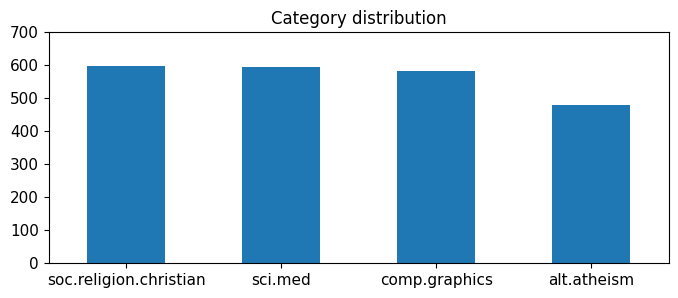

In [65]:
print(X.category_name.value_counts())

X.category_name.value_counts().plot(kind = 'bar',
                                title = 'Category distribution',
                                ylim = [0, 700],
                                rot = 0, fontsize = 11, figsize = (8,3))

comp.graphics             270
sci.med                   262
soc.religion.christian    261
alt.atheism               207
Name: category_name, dtype: int64


<Axes: title={'center': 'Category distribution'}>

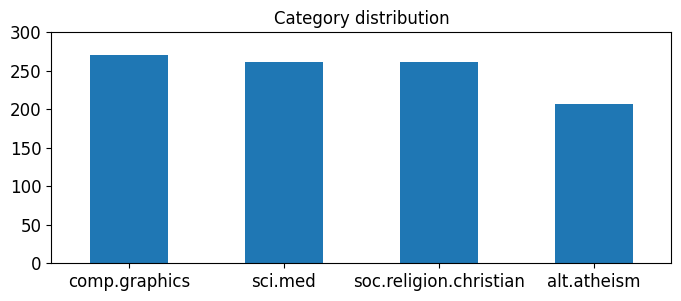

In [66]:
print(X_sample.category_name.value_counts())

X_sample.category_name.value_counts().plot(kind = 'bar',
                                      title = 'Category distribution',
                                      ylim = [0, 300],
                                      rot = 0, fontsize = 12, figsize = (8,3))

---
#### Exercise 7

comp.graphics             270
sci.med                   262
soc.religion.christian    261
alt.atheism               207
Name: category_name, dtype: int64


<Axes: title={'center': 'Category distribution'}>

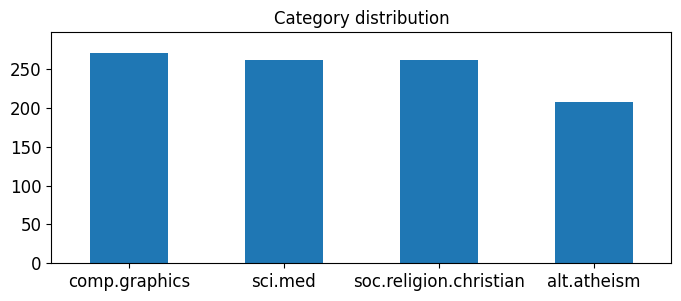

In [67]:
max_count = X_sample.category_name.value_counts().max()

print(X_sample.category_name.value_counts())

X_sample.category_name.value_counts().plot(kind = 'bar',
                                      title = 'Category distribution',
                                      ylim = [0, max_count * 1.1],
                                      rot = 0, fontsize = 12, figsize = (8,3))

---
#### Exercise 8

<Axes: title={'center': 'Category Distribution'}>

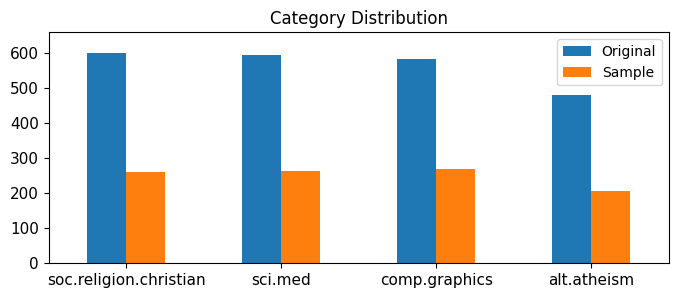

In [68]:
X_counts = X['category_name'].value_counts()
X_sample_counts = X_sample['category_name'].value_counts()

max_count = X_counts.max()

comp_counts = pd.concat([X_counts, X_sample_counts], axis= 1)
comp_counts.columns = ['Original', 'Sample']

comp_counts.plot(kind='bar',
                  title='Category Distribution',
                  ylim=[0, max_count * 1.1],
                  rot=0, fontsize=11, figsize=(8, 3))

---

### 5.2 Feature Creation

In [69]:
import nltk
nltk.download('punkt_tab')

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [70]:
X[0:4]["unigrams"]

0    [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1    [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2    [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3    [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
Name: unigrams, dtype: object

In [71]:
X[0:4]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   

            category_name                                           unigrams  
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...  
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....  
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...  
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...

In [72]:
list(X[0:1]['unigrams'])

[['From',
  ':',
  'sd345',
  '@',
  'city.ac.uk',
  '(',
  'Michael',
  'Collier',
  ')',
  'Subject',
  ':',
  'Converting',
  'images',
  'to',
  'HP',
  'LaserJet',
  'III',
  '?',
  'Nntp-Posting-Host',
  ':',
  'hampton',
  'Organization',
  ':',
  'The',
  'City',
  'University',
  'Lines',
  ':',
  '14',
  'Does',
  'anyone',
  'know',
  'of',
  'a',
  'good',
  'way',
  '(',
  'standard',
  'PC',
  'application/PD',
  'utility',
  ')',
  'to',
  'convert',
  'tif/img/tga',
  'files',
  'into',
  'LaserJet',
  'III',
  'format',
  '.',
  'We',
  'would',
  'also',
  'like',
  'to',
  'do',
  'the',
  'same',
  ',',
  'converting',
  'to',
  'HPGL',
  '(',
  'HP',
  'plotter',
  ')',
  'files',
  '.',
  'Please',
  'email',
  'any',
  'response',
  '.',
  'Is',
  'this',
  'the',
  'correct',
  'group',
  '?',
  'Thanks',
  'in',
  'advance',
  '.',
  'Michael',
  '.',
  '--',
  'Michael',
  'Collier',
  '(',
  'Programmer',
  ')',
  'The',
  'Computer',
  'Unit',
  ',',
  'Emai

### 5.3 Feature subset selection

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
print(X_counts[0])

  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


In [74]:
count_vect.get_feature_names_out()[14887]

'from'

In [75]:
count_vect.get_feature_names_out()[29022]

'sd345'

In [76]:
count_vect.get_feature_names_out()[8696]

'city'

In [77]:
count_vect.get_feature_names_out()[4017]

'ac'

In [78]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

---
#### Exercise 9

In [79]:
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

---

In [80]:
X_counts.shape

(2257, 35788)

In [81]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '0000', '0000001200', '000005102000', '0001',
       '000100255pixel', '00014', '000406', '0007'], dtype=object)

In [82]:
X_counts.shape

(2257, 35788)

In [83]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [84]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

---
#### Exercise 10

In [85]:
selected = X_counts[0:5, 0:100].toarray()[4]

indexes = np.where(selected == 1)

for index in indexes[0]:
  print("Index " + str(index).zfill(2) + ": " + count_vect.get_feature_names_out()[index])


Index 00: 00
Index 37: 01


---

In [86]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [87]:
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [88]:
plot_z = X_counts[0:20, 0:20].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

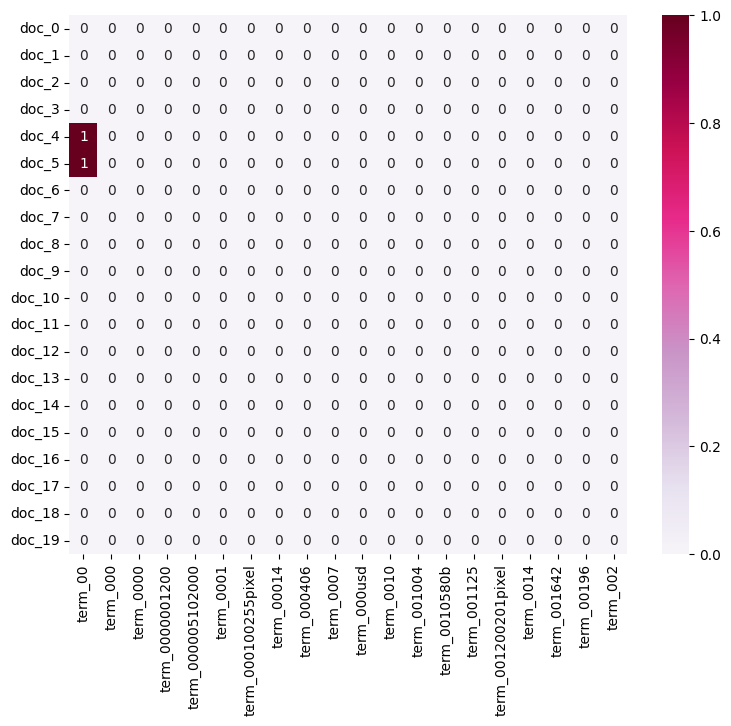

In [89]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                cmap="PuRd",
                vmin=0, vmax=1, annot=True)

---
#### Exercise 11

In [90]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()]
plot_y = ["doc_"+ str(i) for i in list(X.index)]
plot_z = X_counts[:,:].toarray()

plot_z.shape

(2257, 35788)

In [91]:
mask = count_vect.get_feature_names_out()

mask = np.array([len(word) > 4 for word in mask])

plot_z = plot_z[:, mask]
plot_x = [plot_x[i] for i in range(len(plot_x)) if mask[i]]

plot_z.shape

(2257, 28577)

In [92]:
column_sum = np.sum(plot_z, axis=0)
top_40 = np.argpartition(column_sum, -40)[-40:]

top_40_indices = top_40[np.argsort(-column_sum[top_40])]

columns_to_keep = np.zeros(column_sum.shape, dtype=bool)
columns_to_keep[top_40_indices] = True

plot_z = plot_z[:, columns_to_keep]
plot_x = [plot_x[i] for i in range(len(plot_x)) if columns_to_keep[i]]

plot_z.shape

(2257, 40)

In [93]:
row_sum = np.sum(plot_z, axis=1)
top_40 = np.argpartition(row_sum, -40)[-40:]

top_40_indices = top_40[np.argsort(-row_sum[top_40])]

rows_to_keep = np.zeros(row_sum.shape, dtype=bool)
rows_to_keep[top_40_indices] = True

plot_z = plot_z[rows_to_keep]
plot_y = [plot_y[i] for i in range(len(plot_y)) if rows_to_keep[i]]

plot_z.shape

(40, 40)

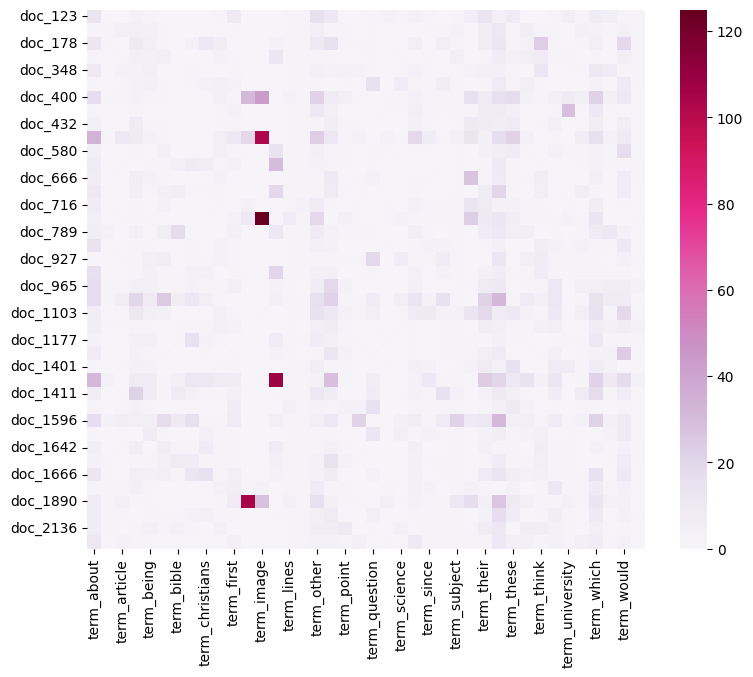

In [94]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                cmap="PuRd",
                vmin=0, vmax=np.max(plot_z), annot=False)

Due to the massive size of the data, there are a lot of redundant values.

In order to minimize these redundant data, I first removed all words shorter than 5 letters. This is to ensure that extremely common words like 'from' and 'they' are removed from the heatmap.

Afterwards I extracted the top 100 most used terms then extracted the top 100 documents that refer to these terms the most. This is done so that the final matrix would only contain the most common terms used between the documents.
  
Finally, I removed the annotation from the heatmap to increase its reability as well as adjusting the vmax value to that of the highest used term so we can get a better read of the range in which 'heat' is concetrated.  

---

### 5.4 Attribute Transformation / Aggregation

In [95]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
  term_frequencies.append(sum(X_counts[:,j].toarray()))

In [96]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [97]:
term_frequencies[0]

134

C:\Users\USER\AppData\Local\Temp\ipykernel_1728\1902080630.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


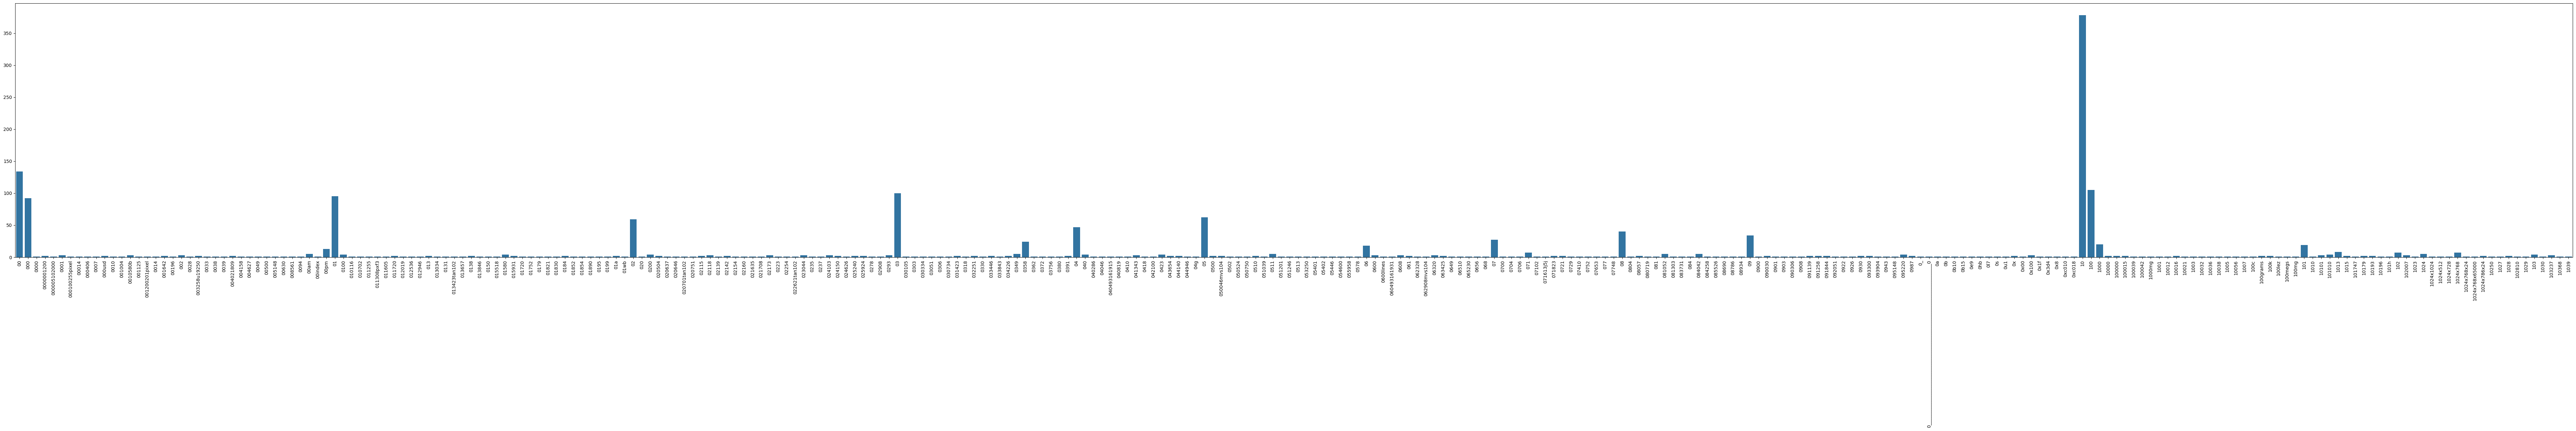

In [98]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

---
#### Exercise 12

In [99]:
frequency_data = pd.DataFrame({
    'term': count_vect.get_feature_names_out(),
    'freq': term_frequencies
})

In [100]:
frequency_data

term  freq
0                00   134
1               000    92
2              0000     1
3        0000001200     2
4      000005102000     1
...             ...   ...
35783         zyxel     2
35784            zz     1
35785           zzz     1
35786            ªl     1
35787      íålittin     1

[35788 rows x 2 columns]

In [101]:
import plotly as pt
import plotly.express as px

fig = px.bar(frequency_data[0:300], x='term', y='freq', title='Term Frequencies',
             text='freq', color_discrete_sequence=['red']
              )

fig.update_layout(
    xaxis_title='Terms',
    yaxis_title='Frequencies',
    width=1000,
    height=500
)

fig.update_yaxes(range=[0, 350])

fig.show()

---
#### Exercise 13

In [102]:
percentile_99 = np.percentile(term_frequencies, 99)

In [103]:
frequency_data_filtered = frequency_data[frequency_data['freq'] > percentile_99]

frequency_data_filtered

term  freq
242       10   378
431       12   236
587       14   239
677       15   293
755       16   278
...      ...   ...
35587  years   432
35601    yes   249
35604    yet   274
35638    you  6157
35648   your  1793

[357 rows x 2 columns]

In [104]:
filtered_fig = px.bar(frequency_data_filtered, x='term', y='freq', title='Term Frequencies',
             text='freq', color_discrete_sequence=['red']
              )

filtered_fig.update_layout(
    xaxis_title='Terms',
    yaxis_title='Frequencies',
    width=2000,
    height=500
)

filtered_fig.update_yaxes(range=[0, 350])

filtered_fig.show()

---
#### Exercise 14

In [105]:
frequency_data_sorted = frequency_data.sort_values(by = 'freq', ascending = False)

frequency_data_sorted

term   freq
32142       the  29825
23610        of  17660
32493        to  17222
4992        and  13017
18474        is  12343
...         ...    ...
24661       pcb      1
24662   pcboard      1
24663     pccvm      1
24664      pcd7      1
35787  íålittin      1

[35788 rows x 2 columns]

In [106]:
sorted_fig = px.bar(frequency_data_sorted, x='term', y='freq', title='Term Frequencies',
             text='freq', color_discrete_sequence=['red']
              )

sorted_fig.update_layout(
    xaxis_title='Terms',
    yaxis_title='Frequencies',
    width=2000,
    height=500
)

sorted_fig.update_yaxes(range=[0, 350])

sorted_fig.show()

---

In [107]:
import math

term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\USER\AppData\Local\Temp\ipykernel_1728\2166548998.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



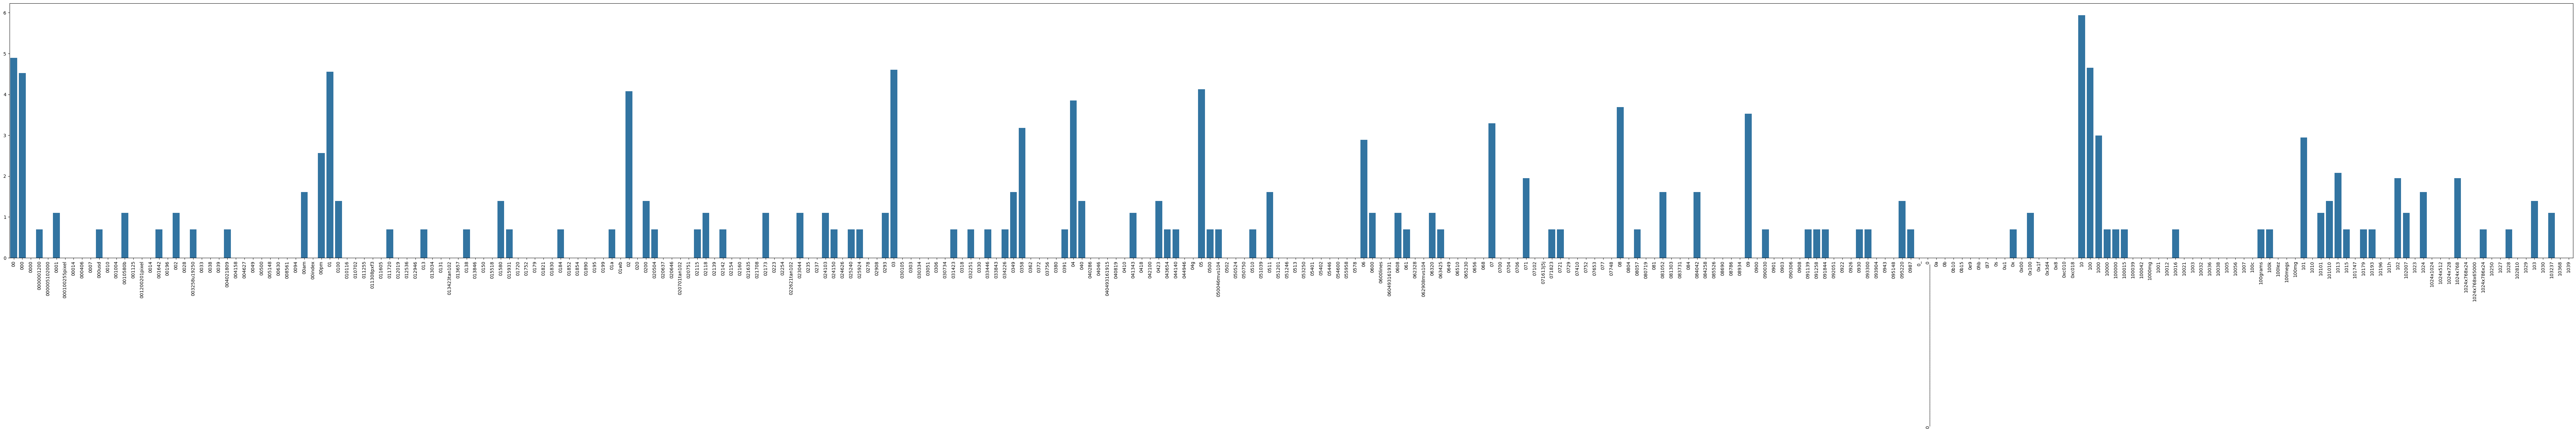

In [108]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

---
#### Exercise 15

C:\Users\USER\AppData\Local\Temp\ipykernel_1728\1902080630.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



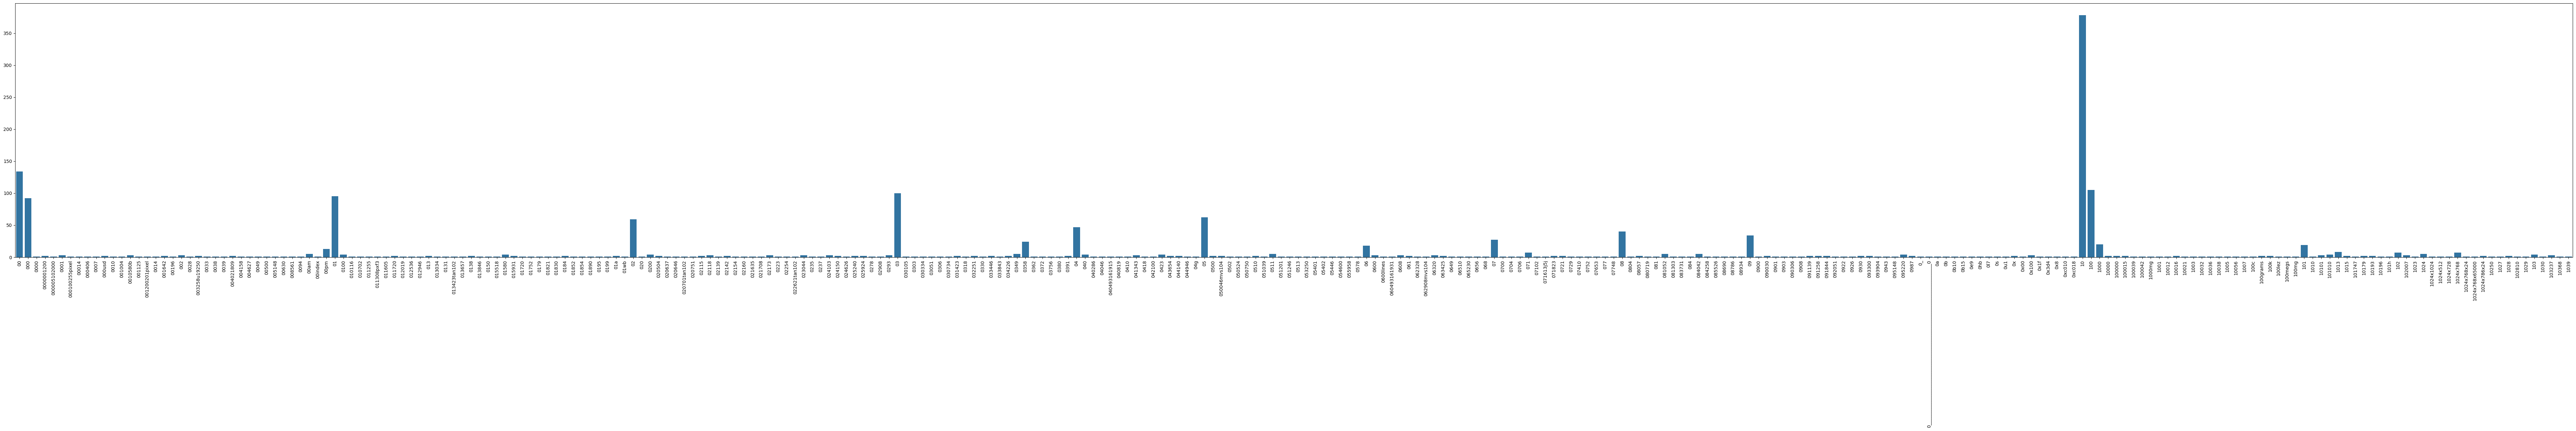

In [109]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

Logarithms linearize exponential growth, making it easier to understand the data. Words that appear more often would not have such a high value and words that appear less would have a much higher value. This allows us to view the data with less extremities.

---

In [110]:
categories = X['category_name'].unique()
category_dfs = {}

for category in categories:
  category_dfs[category] = X[X['category_name'] == category].copy()

def create_term_document_df(df):
  count_vect = CountVectorizer()
  X_counts = count_vect.fit_transform(df['text'])

  words = count_vect.get_feature_names_out()

  term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
  return term_document_df

term_document_dfs = {}

for category in categories:
  term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [111]:
category_number=0
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category comp.graphics:


00  000  000005102000  000100255pixel  0007  000usd  0010580b  \
0     0    0             0               0     0       0         0   
1     0    0             0               0     0       0         0   
2     0    0             0               0     0       0         0   
3     0    0             0               0     0       0         0   
4     0    0             0               0     0       0         0   
..   ..  ...           ...             ...   ...     ...       ...   
579   0    0             0               0     0       0         0   
580   0    0             0               0     0       0         0   
581   0    0             0               0     0       0         0   
582   0    0             0               0     0       0         0   
583   0    0             0               0     0       0         0   

     001200201pixel  00196  002  ...  zorn  zrz  zsoft  zt  zug  zurich  zvi  \
0                 0      0    0  ...     0    0      0   0    0       0    0   
1                 0      0    0  ...     0    0      0   0    0       0    0   
2                 0      0    0  ...     0    0      0   0    0       0    0   
3                 0      0    0  ...     0    0      0   0    0       0    0   
4                 0      0    0  ...     0    0      0   0    0       0    0   
..              ...    ...  ...  ...   ...  ...    ...  ..  ...     ...  ...   
579               0      0    0  ...     0    0      0   0    0       0    0   
580               0      0    0  ...     0    0      0   0    0       0    0   
581               0      0    0  ...     0    0      0   0    0       0    0   
582               0      0    0  ...     0    0      0   0    0       0    0   
583               0      0    0  ...     0    0      0   0    0       0    0   

     zyeh  zyxel  ªl  
0       0      0   0  
1       0      0   0  
2       0      0   0  
3       0      0   0  
4       0      0   0  
..    ...    ...  ..  
579     0      0   0  
580     0      0   0  
581     0      0   0  
582     0      0   0  
583     0      0   0  

[584 rows x 13756 columns]

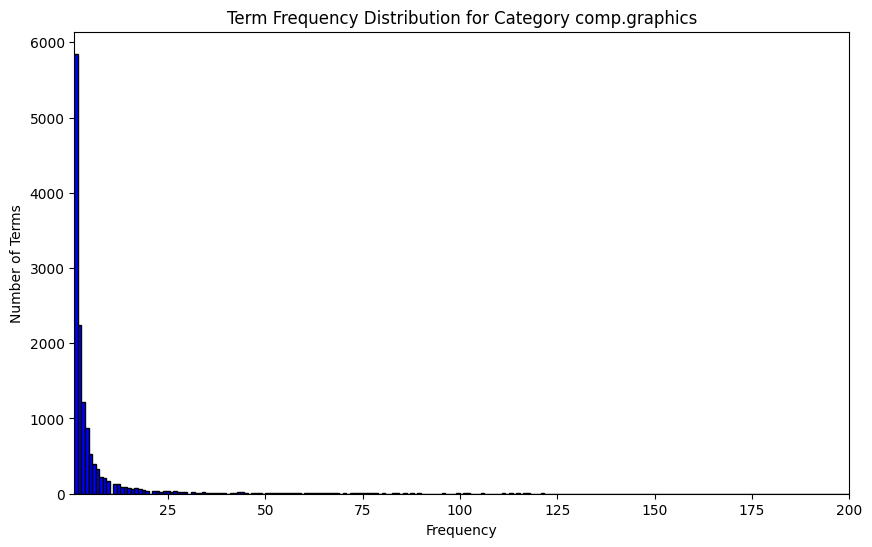

In [112]:
category_number=0
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [113]:
category_number=0
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

sorted_indices = np.argsort(word_counts)
sorted_counts = np.sort(word_counts)[::-1]

total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

top_5_percent_indices = sorted_indices[:top_5_percent_index]

filtered_words = [count_vect.get_feature_names_out()[i] for i in top_5_percent_indices]
print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: comp.graphics
Number of terms in top 5%: 687
Filtered terms: ['blotted', 'breathes', 'breathe', 'breath', 'breakfast', 'breadtubes', 'bread', 'breached', 'breach', 'brazil', 'bratislava', 'braod', 'branches', 'brakfast', 'brainwashing', 'brainwashed', 'brain', 'braille', 'bradford', 'brader', 'brad', 'brackets', 'brachial', 'braces', 'bprofane', 'bozo', 'bozetechova', 'bozeman', 'breathing', 'boys_', 'breech', 'brenner', 'bronchitis', 'brokenness', 'broke', 'brodatz', 'brockton', 'brochure', 'broccoli', 'broadway', 'broadest', 'broader', 'broadened', 'broaden', 'broadcasts', 'broadcast', 'broach', 'brno', 'british', 'britain', 'bristol', 'bring', 'bright', 'bridgeport', 'bribed', 'bribe', 'brett', 'brethren', 'brent', 'brein', 'bronx', 'boynton', 'boycott', 'borrow', 'born', 'boring', 'bore', 'borders', 'borderline', 'border', 'bopped', 'boosters', 'boost', 'boolean', 'boole', 'bookstores', 'bookstore', 'books___________________', 'books__________', 'books', 'booklet', 'bookk

In [114]:
category_number=0
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

sorted_indices = np.argsort(word_counts)
sorted_counts = word_counts[sorted_indices]

total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

filtered_words = [count_vect.get_feature_names_out()[i] for i in bottom_1_percent_indices]
print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: comp.graphics
Number of terms in bottom 1%: 137
Filtered terms: ['blotted', 'breathes', 'breathe', 'breath', 'breakfast', 'breadtubes', 'bread', 'breached', 'breach', 'brazil', 'bratislava', 'braod', 'branches', 'brakfast', 'brainwashing', 'brainwashed', 'brain', 'braille', 'bradford', 'brader', 'brad', 'brackets', 'brachial', 'braces', 'bprofane', 'bozo', 'bozetechova', 'bozeman', 'breathing', 'boys_', 'breech', 'brenner', 'bronchitis', 'brokenness', 'broke', 'brodatz', 'brockton', 'brochure', 'broccoli', 'broadway', 'broadest', 'broader', 'broadened', 'broaden', 'broadcasts', 'broadcast', 'broach', 'brno', 'british', 'britain', 'bristol', 'bring', 'bright', 'bridgeport', 'bribed', 'bribe', 'brett', 'brethren', 'brent', 'brein', 'bronx', 'boynton', 'boycott', 'borrow', 'born', 'boring', 'bore', 'borders', 'borderline', 'border', 'bopped', 'boosters', 'boost', 'boolean', 'boole', 'bookstores', 'bookstore', 'books___________________', 'books__________', 'books', 'booklet', 'bo

In [115]:
category_number=0

def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
  word_sums = term_document_df.sum(axis=0)

  sorted_words = word_sums.sort_values()

  total_words = len(sorted_words)
  top_n = int(top_percent * total_words)
  bottom_n = int(bottom_percent * total_words)

  words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
  print(words_to_remove)
  return term_document_df.drop(columns=words_to_remove)

filtered_term_document_dfs = {}

for category in categories:
  filtered_term_document_dfs[category] = filter_top_bottom_words_by_sum(term_document_dfs[category])
term_document_dfs=filtered_term_document_dfs

print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filtered_term_document_dfs[categories[category_number]]

Index(['initworld', 'jkpg', 'jiu1', 'jiu', 'jfreund', 'jeremy', 'jena', 'jem',
       'jele', 'jeffrey',
       ...
       'you', 'from', 'it', 'for', 'in', 'is', 'and', 'of', 'to', 'the'],
      dtype='object', length=824)
Index(['disparate', 'expose', 'explosive', 'resisting', 'exploitation',
       'exploit', 'resolution', 'resort', 'resorted', 'resounding',
       ...
       'you', 'not', 'it', 'in', 'is', 'that', 'and', 'to', 'of', 'the'],
      dtype='object', length=831)
Index(['íålittin', 'icl', 'icgln', 'iceskate', 'icemt', 'tti', 'ibuprophen',
       'tty', 'tu', 'i3a',
       ...
       'edu', 'for', 'it', 'that', 'is', 'in', 'and', 'to', 'of', 'the'],
      dtype='object', length=974)
Index(['zyklon', 'plagerize', 'disqualified', 'disproving', 'disproven',
       'disproved', 'planners', 'dispossess', 'dispite', 'disperse',
       ...
       'not', 'you', 'it', 'in', 'and', 'that', 'is', 'to', 'of', 'the'],
      dtype='object', length=717)
Filtered Term-Document Frequency 

000  000005102000  000100255pixel  0007  000usd  0010580b  \
0      0             0               0     0       0         0   
1      0             0               0     0       0         0   
2      0             0               0     0       0         0   
3      0             0               0     0       0         0   
4      0             0               0     0       0         0   
..   ...           ...             ...   ...     ...       ...   
579    0             0               0     0       0         0   
580    0             0               0     0       0         0   
581    0             0               0     0       0         0   
582    0             0               0     0       0         0   
583    0             0               0     0       0         0   

     001200201pixel  00196  002  0028  ...  zorn  zrz  zsoft  zt  zug  zurich  \
0                 0      0    0     0  ...     0    0      0   0    0       0   
1                 0      0    0     0  ...     0    0      0   0    0       0   
2                 0      0    0     0  ...     0    0      0   0    0       0   
3                 0      0    0     0  ...     0    0      0   0    0       0   
4                 0      0    0     0  ...     0    0      0   0    0       0   
..              ...    ...  ...   ...  ...   ...  ...    ...  ..  ...     ...   
579               0      0    0     0  ...     0    0      0   0    0       0   
580               0      0    0     0  ...     0    0      0   0    0       0   
581               0      0    0     0  ...     0    0      0   0    0       0   
582               0      0    0     0  ...     0    0      0   0    0       0   
583               0      0    0     0  ...     0    0      0   0    0       0   

     zvi  zyeh  zyxel  ªl  
0      0     0      0   0  
1      0     0      0   0  
2      0     0      0   0  
3      0     0      0   0  
4      0     0      0   0  
..   ...   ...    ...  ..  
579    0     0      0   0  
580    0     0      0   0  
581    0     0      0   0  
582    0     0      0   0  
583    0     0      0   0  

[584 rows x 12932 columns]

---
#### Answer 16
The filtered words from each category is drastically different from one another. However, it can be perceived that each category follows a particular theme which corresponds to their category label.

Category 1 has coding or editorial words such as: recompile, editings, and projects.

Category 2 has more scolarly words such as: interdisciplinary, surroundings, and sirach

Category 3 has more academic words such as: enrolled.

Category 4 has more words indicating some danger such as: lion, screaming, and rationing.

Each category follows a theme but their themes are vastly different hence the word content is also different.

---

In [116]:
from PAMI.extras.convert import denseDF2DB as db

In [117]:
for category in term_document_dfs:
  category_safe = category.replace('.', '_')

  obj = db.denseDF2DB(term_document_dfs[category])
  obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Database size (total no of transactions) : 584
Number of items : 12932
Minimum Transaction Size : 4
Average Transaction Size : 56.41267123287671
Maximum Transaction Size : 2063
Standard Deviation Transaction Size : 152.52064505570053
Variance in Transaction Sizes : 23302.448621325693
Sparsity : 0.995637745806304


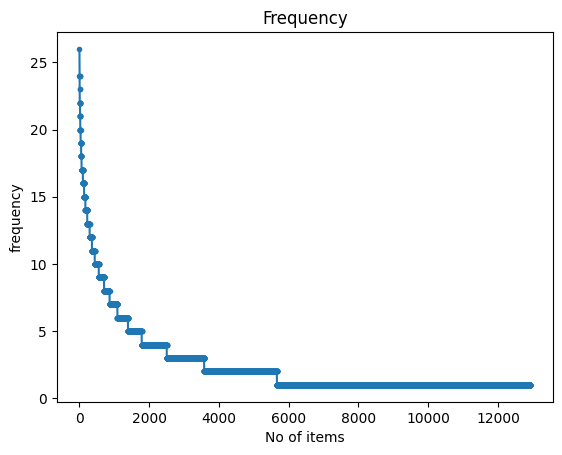

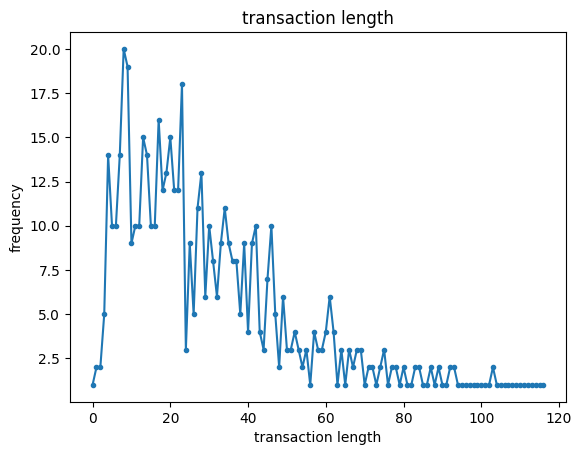

In [131]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase(
    r'C:\Users\USER\Desktop\University\1-1\DM\DMLab1_Master\DM2024-Lab1-Master\td_freq_db_comp_graphics.csv'
    )
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 594
Number of items : 15283
Minimum Transaction Size : 9
Average Transaction Size : 74.55892255892256
Maximum Transaction Size : 1070
Standard Deviation Transaction Size : 115.43440452043433
Variance in Transaction Sizes : 13347.572407606136
Sparsity : 0.9951214471923757


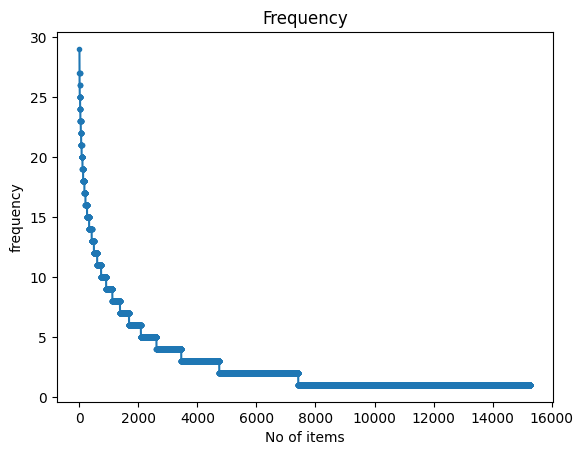

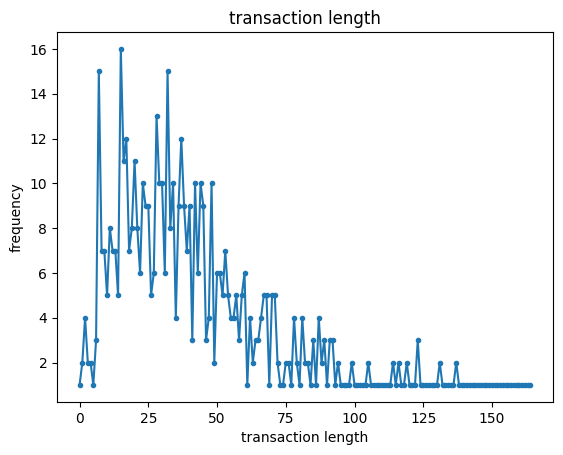

In [132]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase(
    r'C:\Users\USER\Desktop\University\1-1\DM\DMLab1_Master\DM2024-Lab1-Master\td_freq_db_sci_med.csv'
    )
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 599
Number of items : 13041
Minimum Transaction Size : 2
Average Transaction Size : 77.04507512520868
Maximum Transaction Size : 460
Standard Deviation Transaction Size : 62.384260554199
Variance in Transaction Sizes : 3898.3039849023735
Sparsity : 0.9940920884038641


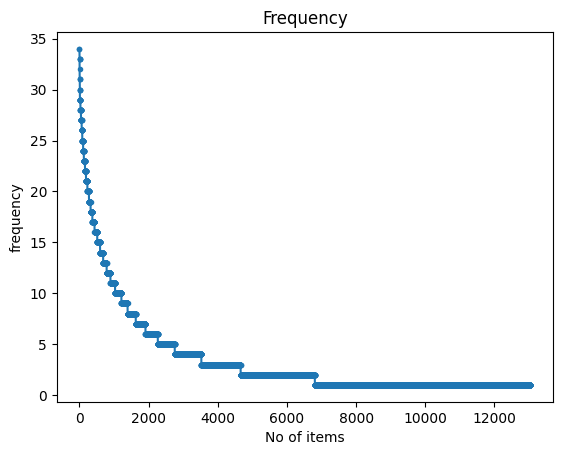

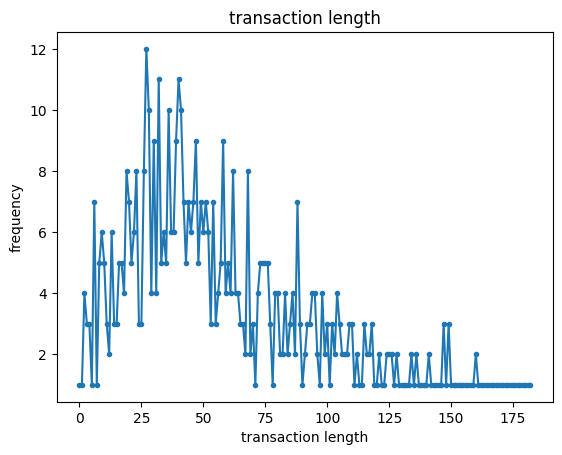

In [122]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase(
    r'C:\Users\USER\Desktop\University\1-1\DM\DM2024-Lab1-Master\td_freq_db_soc_religion_christian.csv'
    )
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 480
Number of items : 11250
Minimum Transaction Size : 5
Average Transaction Size : 75.59791666666666
Maximum Transaction Size : 1395
Standard Deviation Transaction Size : 105.33869380396925
Variance in Transaction Sizes : 11119.405841162144
Sparsity : 0.9932801851851852


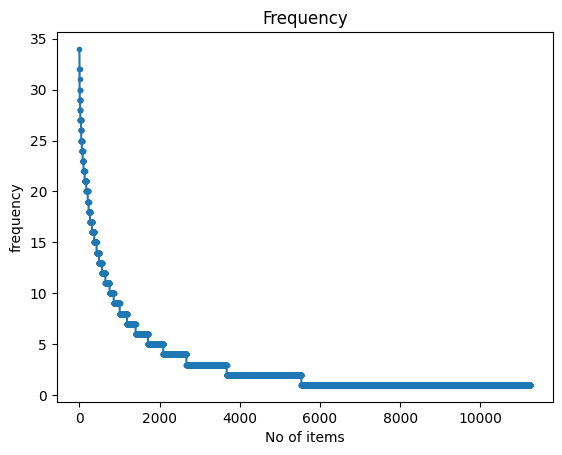

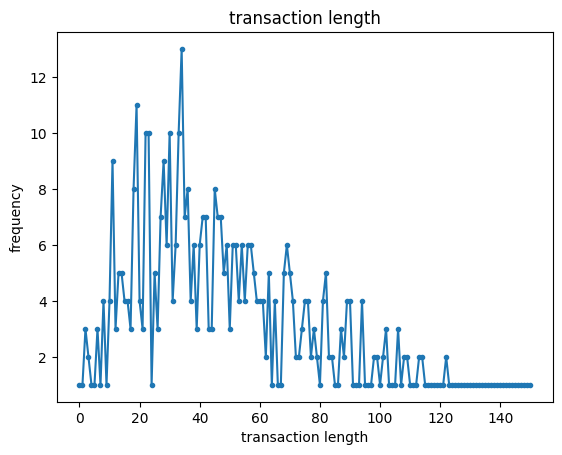

In [133]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase(
    r'C:\Users\USER\Desktop\University\1-1\DM\DMLab1_Master\DM2024-Lab1-Master\td_freq_db_alt_atheism.csv'
    )
obj.run()
obj.printStats()
obj.plotGraphs()

In [134]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(
    iFile=r'C:\Users\USER\Desktop\University\1-1\DM\DMLab1_Master\DM2024-Lab1-Master\td_freq_db_sci_med.csv',
    minSup=minSup
    )
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med)))
print('Runtime: ' + str(obj1.getRuntime()))

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 10000
Runtime: 0.18205046653747559


In [135]:
obj1.save('freq_patterns_sci_med_minSup9.txt')
frequentPatternsDF_sci_med

Patterns  Support
0          leave        9
1          swell        9
2          color        9
3       confused        9
4       learning        9
...          ...      ...
9995       means       27
9996       haven       27
9997      happen       27
9998  originator       27
9999        came       29

[10000 rows x 2 columns]

In [136]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(
    iFile=r'C:\Users\USER\Desktop\University\1-1\DM\DMLab1_Master\DM2024-Lab1-Master\td_freq_db_alt_atheism.csv',
    minSup=minSup
    )
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_alt_atheism)))
print('Runtime: ' + str(obj2.getRuntime()))

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 4676
Runtime: 0.19103765487670898


In [137]:
obj2.save('freq_patterns_alt_atheism_minSup9.txt')
frequentPatternsDF_alt_atheism

Patterns  Support
0            choices        9
1               corp        9
2           hausmann        9
3     hausmann maddi        9
4               kids        9
...              ...      ...
4671            date       31
4672        date gmt       19
4673            stay       32
4674         snm6394       32
4675             gmt       34

[4676 rows x 2 columns]

In [138]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(
    iFile=r'C:\Users\USER\Desktop\University\1-1\DM\DMLab1_Master\DM2024-Lab1-Master\td_freq_db_comp_graphics.csv',
    minSup=minSup
    )
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics)))
print('Runtime: ' + str(obj3.getRuntime()))

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 33574
Runtime: 0.4510922431945801


In [139]:
obj3.save('freq_patterns_comp_graphics_minSup9.txt')
frequentPatternsDF_comp_graphics

Patterns  Support
0      individual        9
1         certain        9
2            hall        9
3            mike        9
4              vr        9
...           ...      ...
33569        life       24
33570       ideas       24
33571        feel       24
33572       tried       24
33573       maybe       26

[33574 rows x 2 columns]

In [140]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj4 = alg.FPGrowth(
    iFile=r'C:\Users\USER\Desktop\University\1-1\DM\DMLab1_Master\DM2024-Lab1-Master\td_freq_db_soc_religion_christian.csv',
    minSup=minSup
    )
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_soc_religion_christian)))
print('Runtime: ' + str(obj4.getRuntime()))

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 11213
Runtime: 0.26806163787841797


In [141]:
obj4.save('freq_patterns_soc_religion_minSup9.txt') #save the patterns
frequentPatternsDF_soc_religion_christian

Patterns  Support
0         latest        9
1            san        9
2          seven        9
3        schools        9
4          chose        9
...          ...      ...
11208         34       33
11209  institute       33
11210       ways       33
11211         oh       34
11212       send       34

[11213 rows x 2 columns]

In [142]:
import pandas as pd

dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]

pattern_counts = {}
for df in dfs:
  for pattern in df['Patterns']:
    if pattern not in pattern_counts:
      pattern_counts[pattern] = 1
    else:
      pattern_counts[pattern] += 1

unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
total_patterns_count = sum(len(df) for df in dfs)
discarded_patterns_count = total_patterns_count - len(unique_patterns)

filtered_dfs = []
for df in dfs:
  filtered_df = df[df['Patterns'].isin(unique_patterns)]
  filtered_dfs.append(filtered_df)

final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

print(final_pattern_df)
print(f"Number of patterns discarded: {discarded_patterns_count}")


                        Patterns  Support
19911                        gov       33
19912                  institute       33
57158                    snm6394       32
19910                       form       31
57156                    deleted       30
...                          ...      ...
54045  axes funds motss matching        9
54044   boy funds motss matching        9
54043    boy axes motss matching        9
54042    et funds motss matching        9
0                          swell        9

[57159 rows x 2 columns]
Number of patterns discarded: 2304


In [143]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])
terms = count_vect.get_feature_names_out()

X['tokenized_text'] = X['text'].str.split().apply(set)

pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

for pattern in final_pattern_df['Patterns']:
  pattern_words = set(pattern.split())
  pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)
augmented_df

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
0      0    0     0           0             0     0               0      0   
1      0    0     0           0             0     0               0      0   
2      0    0     0           0             0     0               0      0   
3      0    0     0           0             0     0               0      0   
4      1    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
2252   0    0     0           0             0     0               0      1   
2253   0    0     0           0             0     0               0      0   
2254   0    0     0           0             0     0               0      0   
2255   0    0     0           0             0     0               0      0   
2256   0    0     0           0             0     0               0      0   

      000406  0007  ...  soc princeton funds motss matching  \
0          0     0  ...                                   0   
1          0     0  ...                                   0   
2          0     0  ...                                   0   
3          0     0  ...                                   0   
4          0     0  ...                                   0   
...      ...   ...  ...                                 ...   
2252       0     0  ...                                   0   
2253       0     0  ...                                   0   
2254       0     0  ...                                   0   
2255       0     0  ...                                   0   
2256       0     0  ...                                   0   

      soc princeton boy motss matching  et axes motss matching  \
0                                    0                       0   
1                                    0                       0   
2                                    0                       0   
3                                    0                       0   
4                                    0                       0   
...                                ...                     ...   
2252                                 0                       0   
2253                                 0                       0   
2254                                 0                       0   
2255                                 0                       0   
2256                                 0                       0   

      soc princeton et motss matching  soc princeton al motss matching  \
0                                   0                                0   
1                                   0                                0   
2                                   0                                0   
3                                   0                                0   
4                                   0                                0   
...                               ...                              ...   
2252                                0                                0   
2253                                0                                0   
2254                                0                                0   
2255                                0                                0   
2256                                0                                0   

      axes funds motss matching  boy funds motss matching  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   
...                         ...                       ...   
2252                          0                         0   
2253                          0                         0   
2254                          0                         0   
2255                

---
#### Exercise 17

FAE Top-K 500

In [144]:
from PAMI.frequentPattern.topk import FAE as alg

In [145]:
fae_500 = alg.FAE(
    iFile=r'C:\Users\USER\Desktop\University\1-1\DM\DMLab1_Master\DM2024-Lab1-Master\td_freq_db_comp_graphics.csv',
    k= 500)
fae_500.mine()

 TopK frequent patterns were successfully generated using FAE algorithm.


In [146]:
fae_500_results = fae_500.getPatterns()
print("Total number of Frequent Patterns:", len(fae_500_results))

fae_500.save('fae_comp_graphics_500.txt')

fae_500_df = fae_500.getPatternsAsDataFrame()

print(fae_500_df)

run = fae_500.getRuntime()

print("Total ExecutionTime in seconds:", run)

Total number of Frequent Patterns: 500
                                              Patterns  Support
0                                                maybe       26
1                                                 life       24
2                                                ideas       24
3                                                 feel       24
4                                                tried       24
..                                                 ...      ...
495  awful posts curious concerning proposed learn ...       12
496  posts curious concerning proposed learn forum ...       12
497  convenience posts curious concerning proposed ...       12
498  posts curious concerning proposed learn forum ...       12
499  posts curious concerning proposed learn forum ...       12

[500 rows x 2 columns]
Total ExecutionTime in seconds: 0.7581648826599121


In [147]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])
terms = count_vect.get_feature_names_out()

X['tokenized_text'] = X['text'].str.split().apply(set)

pattern_matrix = pd.DataFrame(0, index=X.index, columns=fae_500_df['Patterns'])

for pattern in fae_500_df['Patterns']:
  pattern_words = set(pattern.split())
  pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

tdm_df_500 = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

augmented_df_500 = pd.concat([tdm_df_500, pattern_matrix], axis=1)
augmented_df_500

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
0      0    0     0           0             0     0               0      0   
1      0    0     0           0             0     0               0      0   
2      0    0     0           0             0     0               0      0   
3      0    0     0           0             0     0               0      0   
4      1    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
2252   0    0     0           0             0     0               0      1   
2253   0    0     0           0             0     0               0      0   
2254   0    0     0           0             0     0               0      0   
2255   0    0     0           0             0     0               0      0   
2256   0    0     0           0             0     0               0      0   

      000406  0007  ...  \
0          0     0  ...   
1          0     0  ...   
2          0     0  ...   
3          0     0  ...   
4          0     0  ...   
...      ...   ...  ...   
2252       0     0  ...   
2253       0     0  ...   
2254       0     0  ...   
2255       0     0  ...   
2256       0     0  ...   

      discussing posts curious concerning proposed learn forum personally feel convenience  \
0                                                     0                                      
1                                                     0                                      
2                                                     0                                      
3                                                     0                                      
4                                                     0                                      
...                                                 ...                                      
2252                                                  0                                      
2253                                                  0                                      
2254                                                  0                                      
2255                                                  0                                      
2256                                                  0                                      

      discussing posts curious concerning proposed learn forum personally feel wate  \
0                                                     0                               
1                                                     0                               
2                                                     0                               
3                                                     0                               
4                                                     0                               
...                                                 ...                               
2252                                                  0                               
2253                                                  0                               
2254                                                  0                               
2255                                                  0                               
2256                                                  0                               

      posts curious concerning proposed learn forum personally feel discussing  \
0                                                     0                          
1                                                     0                          
2                                                     0                          
3                                                     0                          
4                                                     0                          
...                                                 ...                       

FAE Top-K 1000

In [148]:
fae_1000 = alg.FAE(
    iFile=r'C:\Users\USER\Desktop\University\1-1\DM\DMLab1_Master\DM2024-Lab1-Master\td_freq_db_comp_graphics.csv',
    k= 1000)
fae_1000.mine()

 TopK frequent patterns were successfully generated using FAE algorithm.


In [149]:
fae_1000_results = fae_1000.getPatterns()
print("Total number of Frequent Patterns:", len(fae_1000_results))

fae_1000.save('fae_comp_graphics_1000.txt')

fae_1000_df = fae_1000.getPatternsAsDataFrame()

print(fae_1000_df)

run = fae_1000.getRuntime()

print("Total ExecutionTime in seconds:", run)

Total number of Frequent Patterns: 1000
                                              Patterns  Support
0                                                maybe       26
1                                                 life       24
2                                                ideas       24
3                                                 feel       24
4                                                tried       24
..                                                 ...      ...
995          favor proposed forum personally feel wate       12
996               proposed forum personally feel favor       12
997  convenience awful discussing posts curious con...       12
998  awful discussing posts curious concerning prop...       12
999  awful discussing posts curious concerning prop...       12

[1000 rows x 2 columns]
Total ExecutionTime in seconds: 1.6803791522979736


In [150]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])
terms = count_vect.get_feature_names_out()

X['tokenized_text'] = X['text'].str.split().apply(set)

pattern_matrix = pd.DataFrame(0, index=X.index, columns=fae_1000_df['Patterns'])

for pattern in fae_1000_df['Patterns']:
  pattern_words = set(pattern.split())
  pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

tdm_df_1000 = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

augmented_df_1000 = pd.concat([tdm_df_1000, pattern_matrix], axis=1)
augmented_df_1000

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
0      0    0     0           0             0     0               0      0   
1      0    0     0           0             0     0               0      0   
2      0    0     0           0             0     0               0      0   
3      0    0     0           0             0     0               0      0   
4      1    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
2252   0    0     0           0             0     0               0      1   
2253   0    0     0           0             0     0               0      0   
2254   0    0     0           0             0     0               0      0   
2255   0    0     0           0             0     0               0      0   
2256   0    0     0           0             0     0               0      0   

      000406  0007  ...  \
0          0     0  ...   
1          0     0  ...   
2          0     0  ...   
3          0     0  ...   
4          0     0  ...   
...      ...   ...  ...   
2252       0     0  ...   
2253       0     0  ...   
2254       0     0  ...   
2255       0     0  ...   
2256       0     0  ...   

      awful favor proposed forum personally feel convenience  \
0                                                     0        
1                                                     0        
2                                                     0        
3                                                     0        
4                                                     0        
...                                                 ...        
2252                                                  0        
2253                                                  0        
2254                                                  0        
2255                                                  0        
2256                                                  0        

      awful favor proposed forum personally feel wate  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
2252                                                0   
2253                                                0   
2254                                                0   
2255                                                0   
2256                                                0   

      favor proposed forum personally feel awful  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
...                                          ...   
2252                                           0   
2253                                           0   
2254                                           0   
2255                                           0   
2256                                           0   

      convenience favor proposed forum personally feel wate  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
2252                                                  0       
2253                                                  0       
2254                                                  0       
2255                               

FAE Top-K 1500

In [151]:
fae_1500 = alg.FAE(
    iFile=r'C:\Users\USER\Desktop\University\1-1\DM\DMLab1_Master\DM2024-Lab1-Master\td_freq_db_comp_graphics.csv',
    k= 1500)
fae_1500.mine()

 TopK frequent patterns were successfully generated using FAE algorithm.


In [152]:
fae_1500_results = fae_1500.getPatterns()
print("Total number of Frequent Patterns:", len(fae_1500_results))

fae_1500.save('fae_comp_graphics_1500.txt')

fae_1500_df = fae_1500.getPatternsAsDataFrame()

print(fae_1500_df)

run = fae_1500.getRuntime()

print("Total ExecutionTime in seconds:", run)

Total number of Frequent Patterns: 1500
                                               Patterns  Support
0                                                 maybe       26
1                                                  life       24
2                                                 ideas       24
3                                                  feel       24
4                                                 tried       24
...                                                 ...      ...
1495  awful discussing favor proposed learn personal...       12
1496  discussing favor proposed learn personally fee...       12
1497  convenience discussing favor proposed learn pe...       12
1498  discussing favor proposed learn personally fee...       12
1499  discussing favor proposed learn personally fee...       12

[1500 rows x 2 columns]
Total ExecutionTime in seconds: 4.071913719177246


In [153]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])
terms = count_vect.get_feature_names_out()

X['tokenized_text'] = X['text'].str.split().apply(set)

pattern_matrix = pd.DataFrame(0, index=X.index, columns=fae_1500_df['Patterns'])

for pattern in fae_1500_df['Patterns']:
  pattern_words = set(pattern.split())
  pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

tdm_df_1500 = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

augmented_df_1500 = pd.concat([tdm_df_1500, pattern_matrix], axis=1)
augmented_df_1500

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
0      0    0     0           0             0     0               0      0   
1      0    0     0           0             0     0               0      0   
2      0    0     0           0             0     0               0      0   
3      0    0     0           0             0     0               0      0   
4      1    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
2252   0    0     0           0             0     0               0      1   
2253   0    0     0           0             0     0               0      0   
2254   0    0     0           0             0     0               0      0   
2255   0    0     0           0             0     0               0      0   
2256   0    0     0           0             0     0               0      0   

      000406  0007  ...  \
0          0     0  ...   
1          0     0  ...   
2          0     0  ...   
3          0     0  ...   
4          0     0  ...   
...      ...   ...  ...   
2252       0     0  ...   
2253       0     0  ...   
2254       0     0  ...   
2255       0     0  ...   
2256       0     0  ...   

      posts favor proposed learn personally feel convenience  \
0                                                     0        
1                                                     0        
2                                                     0        
3                                                     0        
4                                                     0        
...                                                 ...        
2252                                                  0        
2253                                                  0        
2254                                                  0        
2255                                                  0        
2256                                                  0        

      posts favor proposed learn personally feel wate  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
2252                                                0   
2253                                                0   
2254                                                0   
2255                                                0   
2256                                                0   

      favor proposed learn personally feel posts  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
...                                          ...   
2252                                           0   
2253                                           0   
2254                                           0   
2255                                           0   
2256                                           0   

      convenience awful discussing favor proposed learn personally feel wate  \
0                                                     0                        
1                                                     0                        
2                                                     0                        
3                                                     0                        
4                                                     0                        
...                                                 ...                        
2252                                                  0                        
2253                     

MaxFPGrowth 3

In [154]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg

In [155]:
fpg_3 = alg.MaxFPGrowth(
    r'C:\Users\USER\Desktop\University\1-1\DM\DMLab1_Master\DM2024-Lab1-Master\td_freq_db_comp_graphics.csv',
    '3')
fpg_3.mine()

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 


In [156]:
fpg_3_results = fpg_3.getPatterns()
print("Total number of Frequent Patterns:", len(fpg_3_results))

fpg_3.save('fpg_comp_graphics_3.txt')

fpg_3_df = fpg_3.getPatternsAsDataFrame()

print(fpg_3_df)

run = fpg_3.getRuntime()

print("Total ExecutionTime in seconds:", run)

Total number of Frequent Patterns: 6872
                                               Patterns  Support
0     due bytes responsible 000 opinion 640x480 rob ...        3
1                                                  bag         3
2                                          garbo uwasa         3
3             wrong 200 responsible 000 umn 480 640 tc         3
4                                responsible 000 essex         3
...                                                 ...      ...
6867                                    didn wondering         3
6868                             feel wrong personally         3
6869                                     wrong correct         3
6870                                      life correct         3
6871                                        maybe life         4

[6872 rows x 2 columns]
Total ExecutionTime in seconds: 19.6834774017334


In [157]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])
terms = count_vect.get_feature_names_out()

X['tokenized_text'] = X['text'].str.split().apply(set)

pattern_matrix = pd.DataFrame(0, index=X.index, columns=fpg_3_df['Patterns'])

for pattern in fpg_3_df['Patterns']:
  pattern_words = set(pattern.split())
  pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

tdm_df_3 = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

augmented_df_3 = pd.concat([tdm_df_3, pattern_matrix], axis=1)
augmented_df_3

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
0      0    0     0           0             0     0               0      0   
1      0    0     0           0             0     0               0      0   
2      0    0     0           0             0     0               0      0   
3      0    0     0           0             0     0               0      0   
4      1    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
2252   0    0     0           0             0     0               0      1   
2253   0    0     0           0             0     0               0      0   
2254   0    0     0           0             0     0               0      0   
2255   0    0     0           0             0     0               0      0   
2256   0    0     0           0             0     0               0      0   

      000406  0007  ...  correct long   wondering knows   exactly wondering   \
0          0     0  ...              0                 0                   0   
1          0     0  ...              0                 0                   0   
2          0     0  ...              0                 0                   0   
3          0     0  ...              0                 0                   0   
4          0     0  ...              0                 0                   0   
...      ...   ...  ...            ...               ...                 ...   
2252       0     0  ...              0                 0                   0   
2253       0     0  ...              0                 0                   0   
2254       0     0  ...              0                 0                   0   
2255       0     0  ...              0                 0                   0   
2256       0     0  ...              0                 0                   0   

      graphic wondering   recently wondering   didn wondering   \
0                      0                    0                0   
1                      0                    0                0   
2                      0                    0                0   
3                      0                    0                0   
4                      0                    0                0   
...                  ...                  ...              ...   
2252                   0                    0                0   
2253                   0                    0                0   
2254                   0                    0                0   
2255                   0                    0                0   
2256                   0                    0                0   

      feel wrong personally   wrong correct   life correct   maybe life   
0                          0               0              0            0  
1                          0               0              0            0  
2                          0               0              0            0  
3                          0               0              0            0  
4                          0               0              0            0  
...                      ...             ...            ...          ...  
2252                       0               0              0            0  
2253                       0               0              0            0  
2254                       0               0              0            0  
2255                       0               0              0            0  
2256                       0               0              0            0  

[2257 rows x 42660 columns]

MaxFPGrowth 6

In [158]:
fpg_6 = alg.MaxFPGrowth(
    r'C:\Users\USER\Desktop\University\1-1\DM\DMLab1_Master\DM2024-Lab1-Master\td_freq_db_comp_graphics.csv',
    '6')
fpg_6.mine()

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 


In [159]:
fpg_6_results = fpg_6.getPatterns()
print("Total number of Frequent Patterns:", len(fpg_6_results))

fpg_6.save('fpg_comp_graphics_6.txt')

fpg_6_df = fpg_6.getPatternsAsDataFrame()

print(fpg_6_df)

run = fpg_6.getRuntime()

print("Total ExecutionTime in seconds:", run)

Total number of Frequent Patterns: 1340
                                 Patterns  Support
0                              tim brock         6
1                                   face         6
2                                 pardon         6
3     removal silent assassin cellar tsa         6
4                               creative         6
...                                   ...      ...
1335                            feel apr         8
1336                                didn        22
1337                               wrong        23
1338                               tried        24
1339                               ideas        24

[1340 rows x 2 columns]
Total ExecutionTime in seconds: 0.342083215713501


In [160]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])
terms = count_vect.get_feature_names_out()

X['tokenized_text'] = X['text'].str.split().apply(set)

pattern_matrix = pd.DataFrame(0, index=X.index, columns=fpg_6_df['Patterns'])

for pattern in fpg_6_df['Patterns']:
  pattern_words = set(pattern.split())
  pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

tdm_df_6 = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

augmented_df_6 = pd.concat([tdm_df_6, pattern_matrix], axis=1)
augmented_df_6

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
0      0    0     0           0             0     0               0      0   
1      0    0     0           0             0     0               0      0   
2      0    0     0           0             0     0               0      0   
3      0    0     0           0             0     0               0      0   
4      1    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
2252   0    0     0           0             0     0               0      1   
2253   0    0     0           0             0     0               0      0   
2254   0    0     0           0             0     0               0      0   
2255   0    0     0           0             0     0               0      0   
2256   0    0     0           0             0     0               0      0   

      000406  0007  ...  needs long   maybe long   knows   wondering   \
0          0     0  ...            0            0       0           0   
1          0     0  ...            0            0       0           0   
2          0     0  ...            0            0       0           0   
3          0     0  ...            0            0       0           0   
4          0     0  ...            0            0       0           0   
...      ...   ...  ...          ...          ...     ...         ...   
2252       0     0  ...            0            0       0           0   
2253       0     0  ...            0            0       0           0   
2254       0     0  ...            0            0       0           0   
2255       0     0  ...            0            1       0           0   
2256       0     0  ...            0            0       0           0   

      apr personally   feel apr   didn   wrong   tried   ideas   
0                   0          0      0       0       0       0  
1                   0          0      0       0       0       0  
2                   0          0      0       0       0       0  
3                   0          0      0       0       0       0  
4                   0          0      0       0       0       0  
...               ...        ...    ...     ...     ...     ...  
2252                0          0      0       0       0       0  
2253                0          0      0       0       0       1  
2254                0          0      0       0       1       0  
2255                0          0      0       0       0       0  
2256                0          0      0       0       0       0  

[2257 rows x 37128 columns]

MaxFPGrowth 9

In [161]:
fpg_9 = alg.MaxFPGrowth(
    r'C:\Users\USER\Desktop\University\1-1\DM\DMLab1_Master\DM2024-Lab1-Master\td_freq_db_comp_graphics.csv',
    '9')
fpg_9.mine()

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 


In [162]:
fpg_9_results = fpg_9.getPatterns()
print("Total number of Frequent Patterns:", len(fpg_9_results))

fpg_9.save('fpg_comp_graphics_9.txt')

fpg_9_df = fpg_9.getPatternsAsDataFrame()

print(fpg_9_df)

run = fpg_9.getRuntime()

print("Total ExecutionTime in seconds:", run)

Total number of Frequent Patterns: 660
                 Patterns  Support
0                    tim         9
1                 option         9
2          rumours 68070         9
3                   chip         9
4    rumours mcmains unt         9
..                    ...      ...
655                wrong        23
656                tried        24
657                ideas        24
658                 life        24
659                maybe        26

[660 rows x 2 columns]
Total ExecutionTime in seconds: 0.13504314422607422


In [163]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])
terms = count_vect.get_feature_names_out()

X['tokenized_text'] = X['text'].str.split().apply(set)

pattern_matrix = pd.DataFrame(0, index=X.index, columns=fpg_9_df['Patterns'])

for pattern in fpg_9_df['Patterns']:
  pattern_words = set(pattern.split())
  pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

tdm_df_9 = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

augmented_df_9 = pd.concat([tdm_df_9, pattern_matrix], axis=1)
augmented_df_9

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
0      0    0     0           0             0     0               0      0   
1      0    0     0           0             0     0               0      0   
2      0    0     0           0             0     0               0      0   
3      0    0     0           0             0     0               0      0   
4      1    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
2252   0    0     0           0             0     0               0      1   
2253   0    0     0           0             0     0               0      0   
2254   0    0     0           0             0     0               0      0   
2255   0    0     0           0             0     0               0      0   
2256   0    0     0           0             0     0               0      0   

      000406  0007  ...  suggestions   graphic   recently   didn   correct   \
0          0     0  ...             0         0          0      0         1   
1          0     0  ...             0         0          0      0         0   
2          0     0  ...             0         0          0      0         0   
3          0     0  ...             0         0          0      0         0   
4          0     0  ...             0         0          0      0         0   
...      ...   ...  ...           ...       ...        ...    ...       ...   
2252       0     0  ...             0         0          0      0         0   
2253       0     0  ...             0         0          0      0         0   
2254       0     0  ...             0         0          0      0         0   
2255       0     0  ...             0         0          0      0         0   
2256       0     0  ...             0         0          0      0         0   

      wrong   tried   ideas   life   maybe   
0          0       0       0      0       0  
1          0       0       0      0       0  
2          0       0       0      0       0  
3          0       0       0      0       0  
4          0       0       0      0       0  
...      ...     ...     ...    ...     ...  
2252       0       0       0      0       0  
2253       0       0       1      1       0  
2254       0       1       0      0       0  
2255       0       0       0      0       1  
2256       0       0       0      0       0  

[2257 rows x 36448 columns]

The number of detected patterns in each method is vastly different, ranging from hundred to thousands. However the detected patterns of each algorithm are quite similar. Words detected utilizing FAE have similar keywords to one another the same as words detected utilizing MaxFPGrowth. Additionally, the length of the pattern detected with the two algorithms are also different. FAE detects longer word patterns whereas MAXFPGrowth detects shorter sentences.

---

### 5.5 Dimensionality Reduction

In [164]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [165]:
X_pca_tdm.shape

(2257, 2)

In [166]:
X_tsne_tdm.shape

(2257, 2)

In [167]:
X_umap_tdm.shape

(2257, 2)

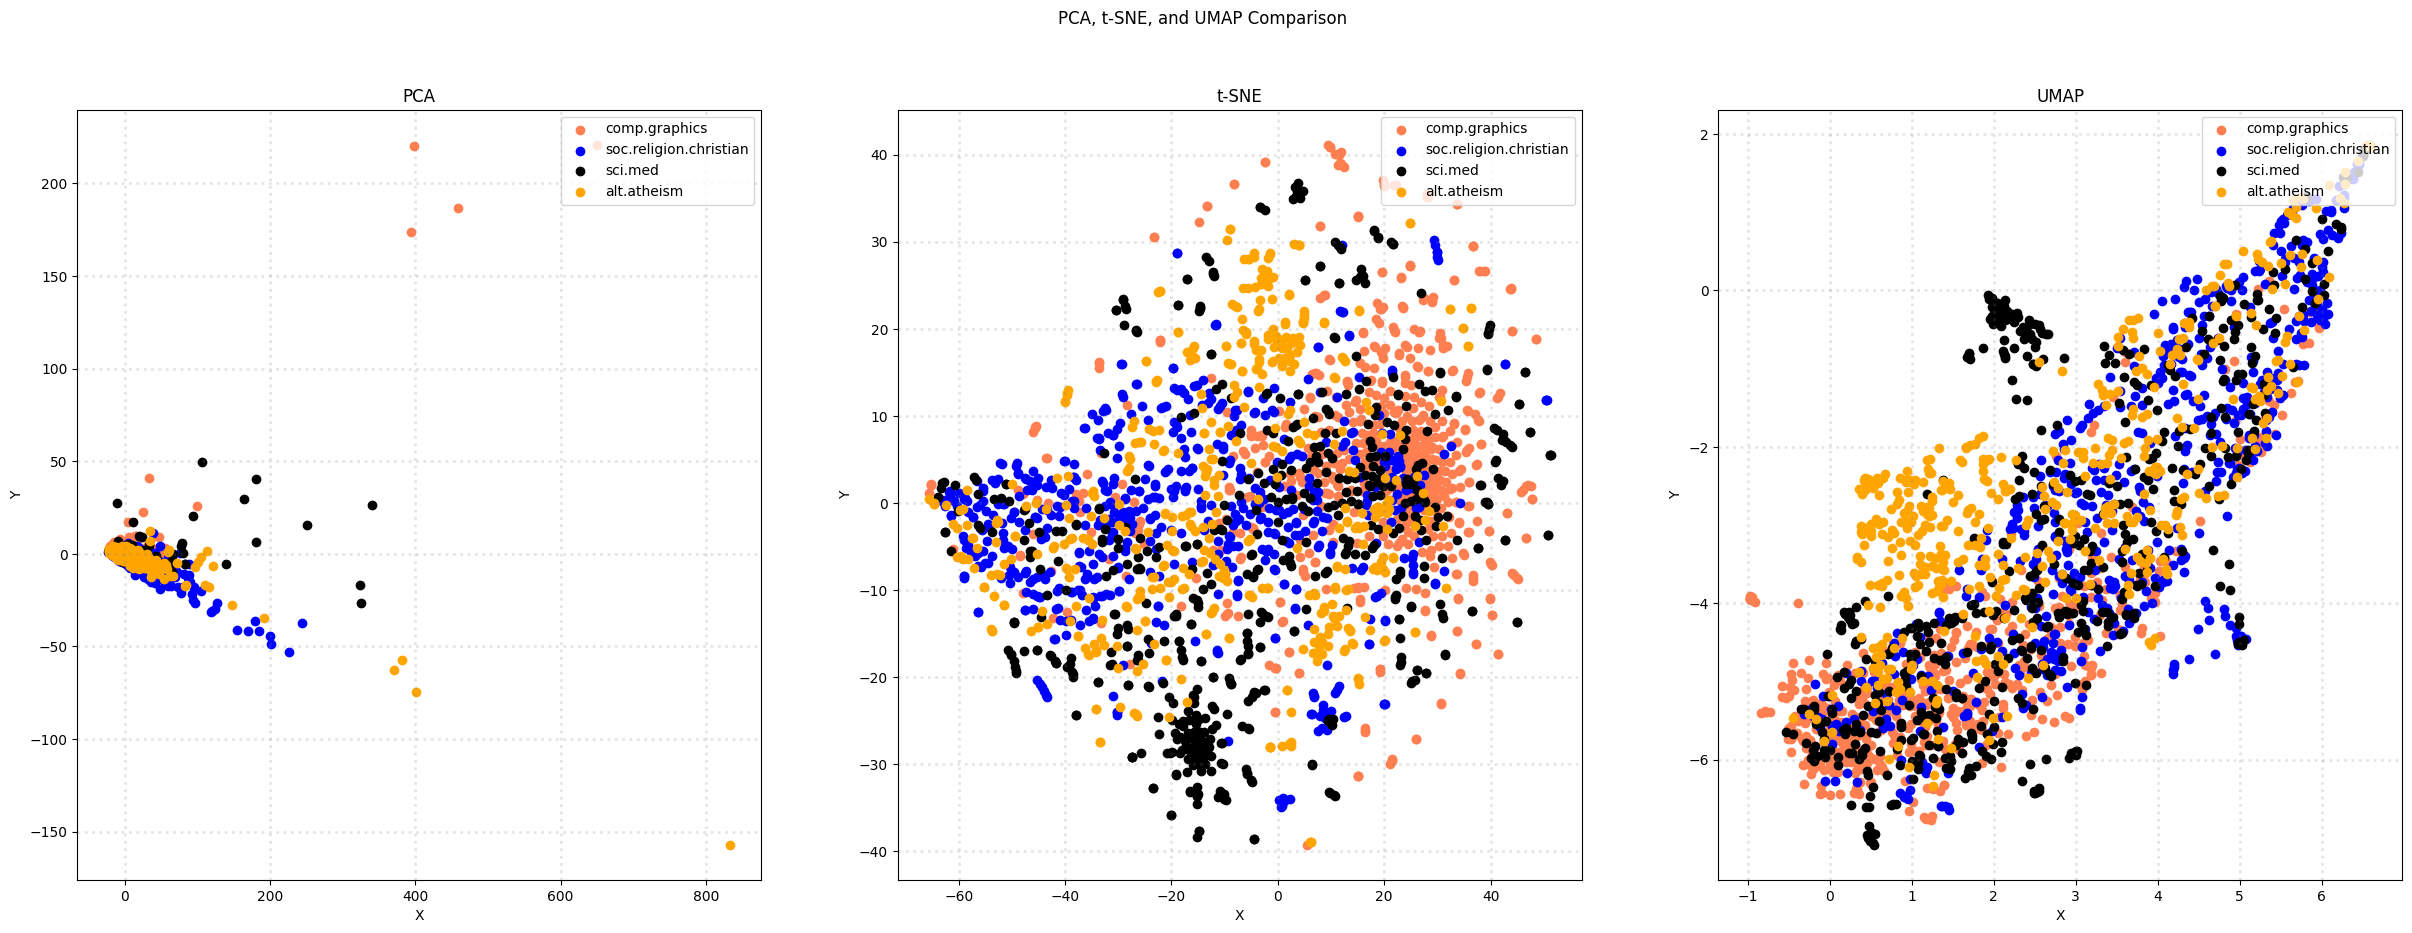

In [168]:
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

def plot_scatter(ax, X_reduced, title):
  for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    ax.scatter(xs, ys, c=c, marker='o', label=category)

  ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
  ax.set_title(title)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.legend(loc='upper right')

plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()


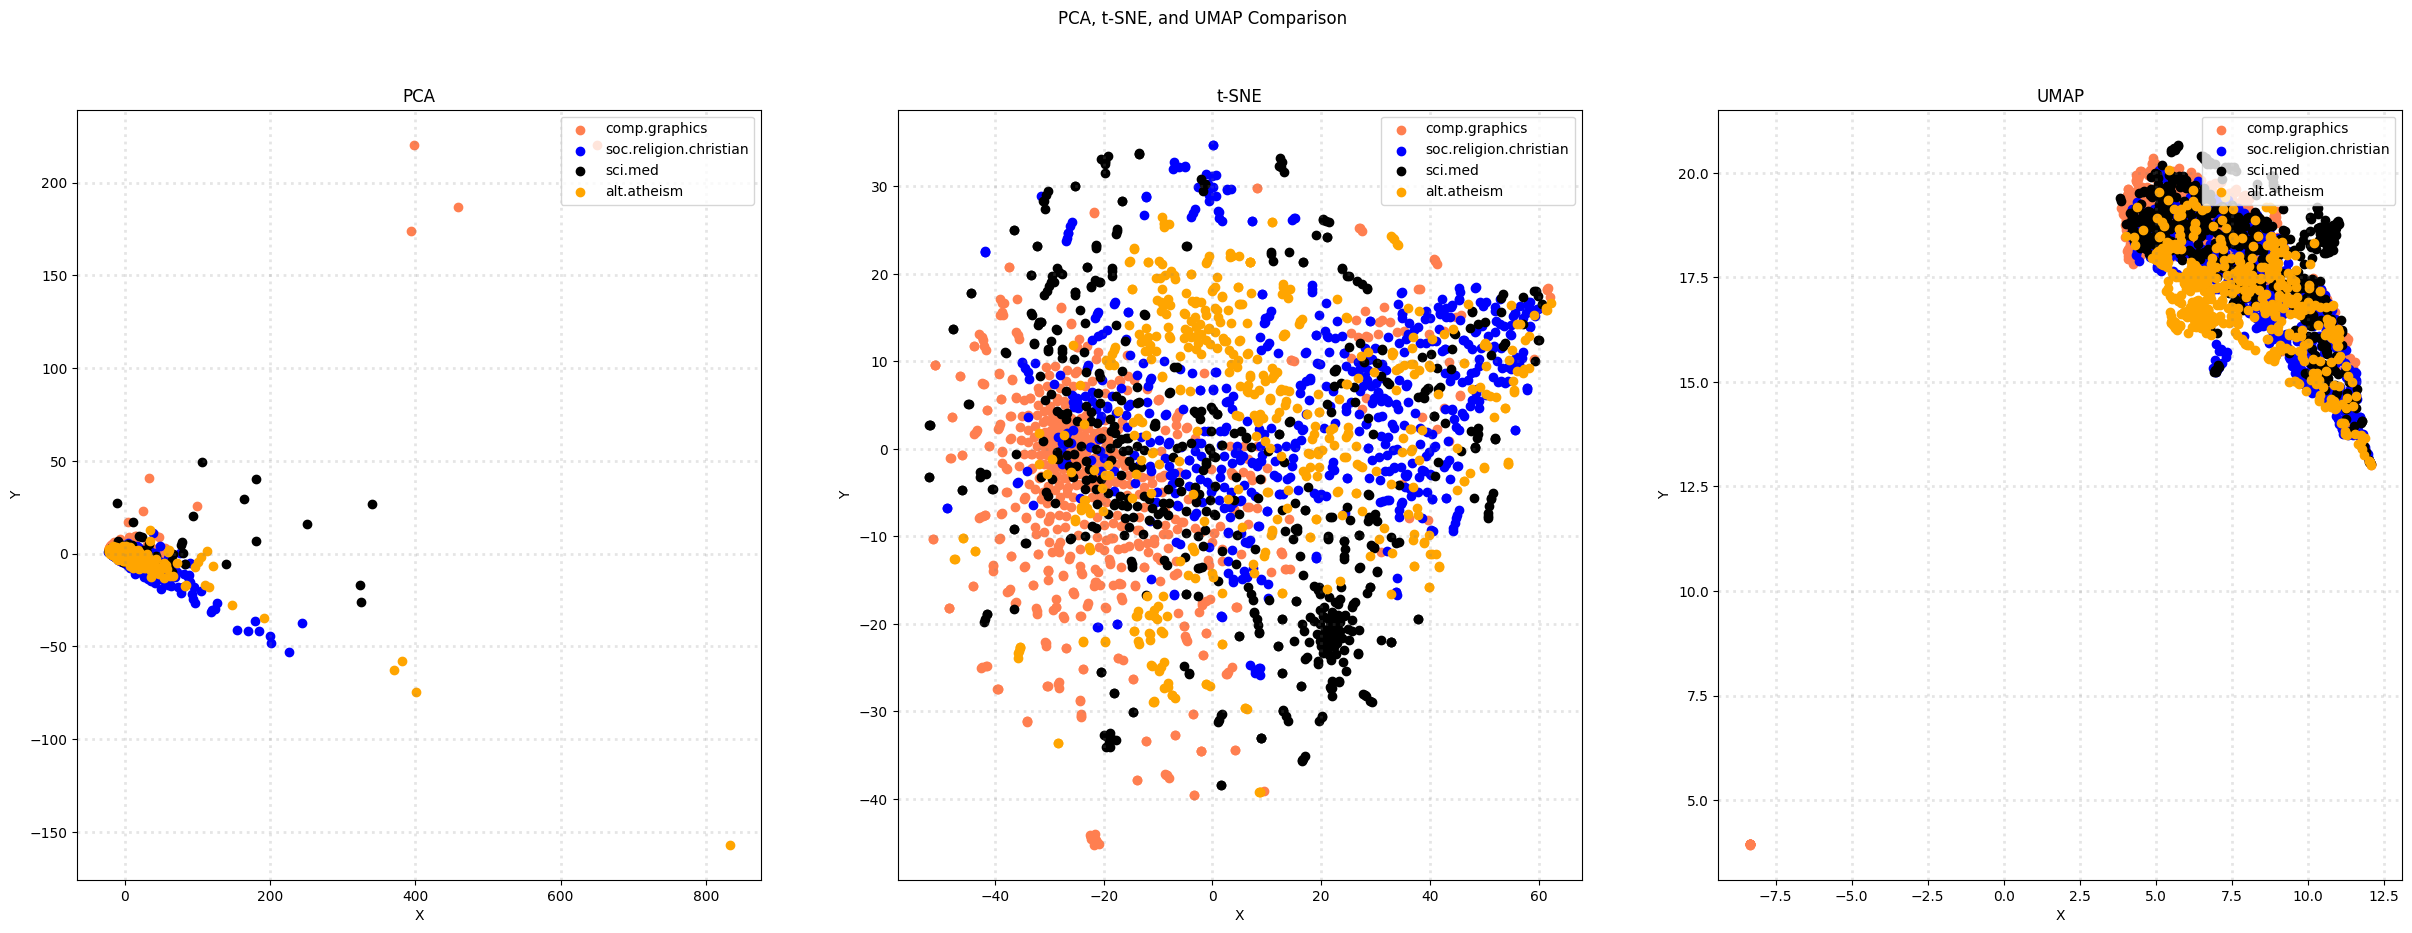

In [169]:
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

def plot_scatter(ax, X_reduced, title):
  for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    ax.scatter(xs, ys, c=c, marker='o', label=category)

  ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
  ax.set_title(title)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.legend(loc='upper right')

plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

---
#### Exercise 18

In [170]:
X_pca_aug_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug_3d = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

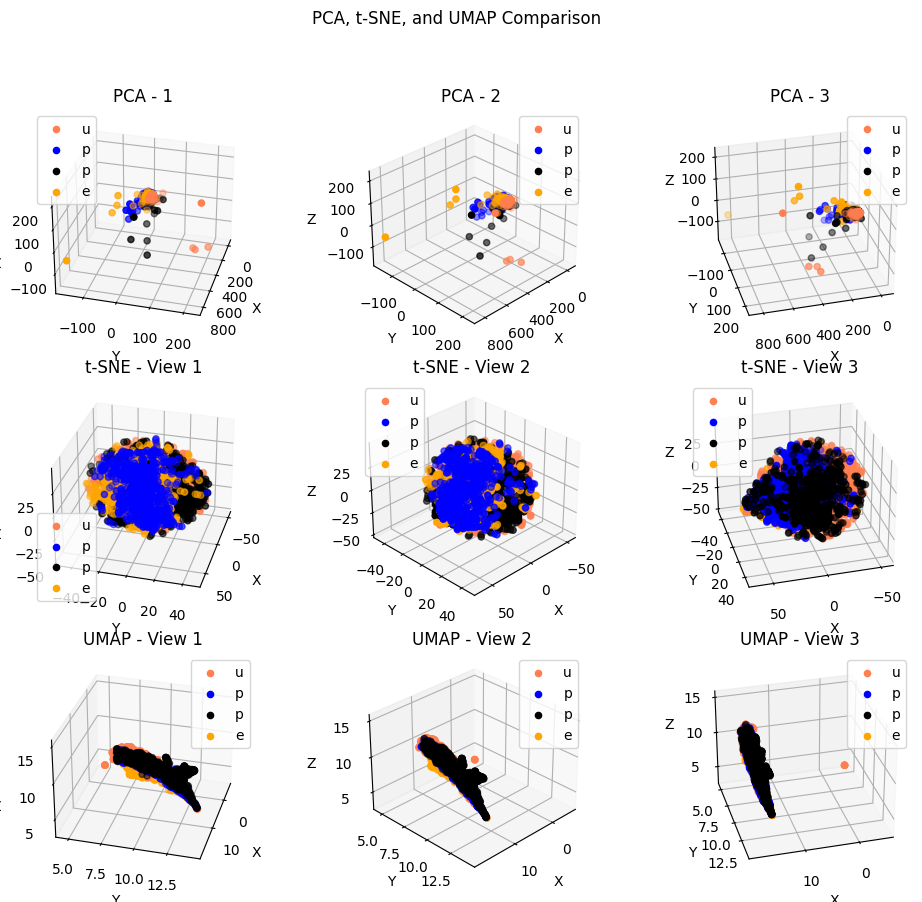

In [193]:
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

fig = plt.figure(figsize=(12, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

def plot_scatter_3d(ax, X_reduced, title, elevation, azim):
  for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c=c, label=category, marker='o')

  ax.set_title(title)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.view_init(elev=elevation, azim=azim)
  ax.legend('upper right')

PCA_ax1 = fig.add_subplot(3, 3, 1, projection='3d')
PCA_ax2 = fig.add_subplot(3, 3, 2, projection='3d')
PCA_ax3 = fig.add_subplot(3, 3, 3, projection='3d')
plot_scatter_3d(PCA_ax1, X_pca_aug_3d, 'PCA - 1', 30, 15)
plot_scatter_3d(PCA_ax2, X_pca_aug_3d, 'PCA - 2', 30, 45)
plot_scatter_3d(PCA_ax3, X_pca_aug_3d, 'PCA - 3', 30, 75)

TSNE_ax1 = fig.add_subplot(3, 3, 4, projection='3d')
TSNE_ax2 = fig.add_subplot(3, 3, 5, projection='3d')
TSNE_ax3 = fig.add_subplot(3, 3, 6, projection='3d')
plot_scatter_3d(TSNE_ax1, X_tsne_aug_3d, 't-SNE - View 1', 30, 15)
plot_scatter_3d(TSNE_ax2, X_tsne_aug_3d, 't-SNE - View 2', 30, 45)
plot_scatter_3d(TSNE_ax3, X_tsne_aug_3d, 't-SNE - View 3', 30, 75)

UMAP_ax1 = fig.add_subplot(3, 3, 7, projection='3d')
UMAP_ax2 = fig.add_subplot(3, 3, 8, projection='3d')
UMAP_ax3 = fig.add_subplot(3, 3, 9, projection='3d')
plot_scatter_3d(UMAP_ax1, X_umap_aug_3d, 'UMAP - View 1', 30, 15)
plot_scatter_3d(UMAP_ax2, X_umap_aug_3d, 'UMAP - View 2', 30, 45)
plot_scatter_3d(UMAP_ax3, X_umap_aug_3d, 'UMAP - View 3', 30, 75)

plt.show()

---

### 5.6 Discretization and Binarization

In [172]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [173]:
mlb = preprocessing.LabelBinarizer()

In [174]:
mlb.fit(X.category)

LabelBinarizer()

In [175]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [176]:
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

                                      tokenized_text  bin_category  
0  {Does, The, III, way, into, would, Organizatio...  [0, 1, 0, 0]  
1  {Does, The, 3d, into, for, ,, I, domain, Organ...  [0, 1, 0, 0]  
2  {being, jobs., Re:, seem, inconceivable, ignor...  [0, 0, 0, 1]  
3  {(M.M., religious, a, Hello,, 1989., for, fill...  [0, 0, 0, 1]  
4  {The, This, In, for, customary,, I, "clothes",...  [0, 0, 0, 1]  
5  {The, so, arrogant, way, matters, In, life, no...  [0, 0, 0, 1]  
6  {The, but, so, Emotions, In, Galatians, for, n...  [0, 0, 0, 1]  
7  {nose., cosmetic, Re:, Becoming, eating, Very,...  [0, 0, 1, 0]  
8  {but, In, >sensitive, I, Organization:, >In, R...  [0, 0, 1, 0]

---
#### Exercise 19

In [177]:
mlb_2 = preprocessing.LabelBinarizer()

mlb_2.fit(X['category_name'])
binarized_categories_2 = mlb_2.transform(X['category_name'])

print(binarized_categories_2)

[[0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 ...
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]]


Yes

---

## 6. Data Exploration

In [178]:
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [179]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['From: ab@nova.cc.purdue.edu (Allen B) Subject: Re: TIFF: philosophical significance of 42 Organization: Purdue University Lines: 39  In article <prestonm.735400848@cs.man.ac.uk> prestonm@cs.man.ac.uk (Martin   Preston) writes: > Why not use the PD C library for reading/writing TIFF files? It took me a > good 20 minutes to start using them in your own app.  I certainly do use it whenever I have to do TIFF, and it usually works very well.  That\'s not my point.  I\'m >philosophically< opposed to it because of its complexity.  This complexity has led to some programs\' poor TIFF writers making some very bizarre files, other programs\' inability to load TIFF images (though they\'ll save them, of course), and a general inability to interchange images between different environments despite the fact they all think they understand TIFF.  As the saying goes, "It\'s not me I\'m worried about- it\'s all the >other<  assholes out there!"  I\'ve had big trouble with misuse and abuse of TIFF over 

In [180]:
from sklearn.preprocessing import binarize

document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [181]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.608862
Cosine Similarity using count bw 1 and 3: 0.622050
Cosine Similarity using count bw 2 and 3: 0.565566
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_1728\1735902601.py:10: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_1728\1735902601.py:11: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_1728\1735902601.py:12: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_1728\1735902601.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scal

## 7. Data Classification

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [183]:
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

In [184]:
X_train

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
634    0    0     0           0             0     0               0      0   
322    0    0     0           0             0     0               0      0   
1725   0    0     0           0             0     0               0      0   
266    0    0     0           0             0     0               0      0   
1138   0    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
1638   0    0     0           0             0     0               0      0   
1095   0    0     0           0             0     0               0      0   
1130   0    0     0           0             0     0               0      0   
1294   0    0     0           0             0     0               0      0   
860    0    0     0           0             0     0               0      0   

      000406  0007  ...  zvi  zvonko  zwart  zyeh  zyklon  zyxel  zz  zzz  ªl  \
634        0     0  ...    0       0      0     0       0      0   0    0   0   
322        0     0  ...    0       0      0     0       0      0   0    0   0   
1725       0     0  ...    0       0      0     0       0      0   0    0   0   
266        0     0  ...    0       0      0     0       0      0   0    0   0   
1138       0     0  ...    0       0      0     0       0      0   0    0   0   
...      ...   ...  ...  ...     ...    ...   ...     ...    ...  ..  ...  ..   
1638       0     0  ...    0       0      0     0       0      0   0    0   0   
1095       0     0  ...    0       0      0     0       0      0   0    0   0   
1130       0     0  ...    0       0      0     0       0      0   0    0   0   
1294       0     0  ...    0       0      0     0       0      0   0    0   0   
860        0     0  ...    0       0      0     0       0      0   0    0   0   

      íålittin  
634          0  
322          0  
1725         0  
266          0  
1138         0  
...        ...  
1638         0  
1095         0  
1130         0  
1294         0  
860          0  

[1579 rows x 35788 columns]

In [185]:
X_test

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
561    0    0     0           0             0     0               0      0   
440    0    0     0           0             0     0               0      0   
1513   0    1     0           0             0     0               0      0   
1360   0    0     0           0             0     0               0      0   
259    0    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
1552   0    0     0           0             0     0               0      0   
331    0    0     0           0             0     0               0      0   
194    0    0     0           0             0     0               0      0   
2122   0    0     0           0             0     0               0      0   
2147   0    0     0           0             0     0               0      0   

      000406  0007  ...  zvi  zvonko  zwart  zyeh  zyklon  zyxel  zz  zzz  ªl  \
561        0     0  ...    0       0      0     0       0      0   0    0   0   
440        0     0  ...    0       0      0     0       0      0   0    0   0   
1513       0     0  ...    0       0      0     0       0      0   0    0   0   
1360       0     0  ...    0       0      0     0       0      0   0    0   0   
259        0     0  ...    0       0      0     0       0      0   0    0   0   
...      ...   ...  ...  ...     ...    ...   ...     ...    ...  ..  ...  ..   
1552       0     0  ...    0       0      0     0       0      0   0    0   0   
331        0     0  ...    0       0      0     0       0      0   0    0   0   
194        0     0  ...    0       0      0     0       0      0   0    0   0   
2122       0     0  ...    0       0      0     0       0      0   0    0   0   
2147       0     0  ...    0       0      0     0       0      0   0    0   0   

      íålittin  
561          0  
440          0  
1513         0  
1360         0  
259          0  
...        ...  
1552         0  
331          0  
194          0  
2122         0  
2147         0  

[678 rows x 35788 columns]

In [186]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.9660766961651918

Classification Report:
                         precision    recall  f1-score   support

           alt.atheism     0.9535    0.9535    0.9535       129
         comp.graphics     0.9540    0.9822    0.9679       169
               sci.med     0.9839    0.9683    0.9760       189
soc.religion.christian     0.9683    0.9581    0.9632       191

              accuracy                         0.9661       678
             macro avg     0.9649    0.9655    0.9651       678
          weighted avg     0.9663    0.9661    0.9661       678



In [187]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)

In [188]:
X_train

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
634    0    0     0           0             0     0               0      0   
322    0    0     0           0             0     0               0      0   
1725   0    0     0           0             0     0               0      0   
266    0    0     0           0             0     0               0      0   
1138   0    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
1638   0    0     0           0             0     0               0      0   
1095   0    0     0           0             0     0               0      0   
1130   0    0     0           0             0     0               0      0   
1294   0    0     0           0             0     0               0      0   
860    0    0     0           0             0     0               0      0   

      000406  0007  ...  soc princeton funds motss matching  \
634        0     0  ...                                   0   
322        0     0  ...                                   0   
1725       0     0  ...                                   0   
266        0     0  ...                                   0   
1138       0     0  ...                                   0   
...      ...   ...  ...                                 ...   
1638       0     0  ...                                   0   
1095       0     0  ...                                   0   
1130       0     0  ...                                   0   
1294       0     0  ...                                   0   
860        0     0  ...                                   0   

      soc princeton boy motss matching  et axes motss matching  \
634                                  0                       0   
322                                  0                       0   
1725                                 0                       0   
266                                  0                       0   
1138                                 0                       0   
...                                ...                     ...   
1638                                 0                       0   
1095                                 0                       0   
1130                                 0                       0   
1294                                 0                       0   
860                                  0                       0   

      soc princeton et motss matching  soc princeton al motss matching  \
634                                 0                                0   
322                                 0                                0   
1725                                0                                0   
266                                 0                                0   
1138                                0                                0   
...                               ...                              ...   
1638                                0                                0   
1095                                0                                0   
1130                                0                                0   
1294                                0                                0   
860                                 0                                0   

      axes funds motss matching  boy funds motss matching  \
634                           0                         0   
322                           0                         0   
1725                          0                         0   
266                           0                         0   
1138                          0                         0   
...                         ...                       ...   
1638                          0                         0   
1095                          0                         0   
1130                          0                         0   
1294                

In [189]:
X_test

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
561    0    0     0           0             0     0               0      0   
440    0    0     0           0             0     0               0      0   
1513   0    1     0           0             0     0               0      0   
1360   0    0     0           0             0     0               0      0   
259    0    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
1552   0    0     0           0             0     0               0      0   
331    0    0     0           0             0     0               0      0   
194    0    0     0           0             0     0               0      0   
2122   0    0     0           0             0     0               0      0   
2147   0    0     0           0             0     0               0      0   

      000406  0007  ...  soc princeton funds motss matching  \
561        0     0  ...                                   0   
440        0     0  ...                                   0   
1513       0     0  ...                                   0   
1360       0     0  ...                                   0   
259        0     0  ...                                   0   
...      ...   ...  ...                                 ...   
1552       0     0  ...                                   0   
331        0     0  ...                                   0   
194        0     0  ...                                   0   
2122       0     0  ...                                   0   
2147       0     0  ...                                   0   

      soc princeton boy motss matching  et axes motss matching  \
561                                  0                       0   
440                                  0                       0   
1513                                 0                       0   
1360                                 0                       0   
259                                  0                       0   
...                                ...                     ...   
1552                                 0                       0   
331                                  0                       0   
194                                  0                       0   
2122                                 0                       0   
2147                                 0                       0   

      soc princeton et motss matching  soc princeton al motss matching  \
561                                 0                                0   
440                                 0                                0   
1513                                0                                0   
1360                                0                                0   
259                                 0                                0   
...                               ...                              ...   
1552                                0                                0   
331                                 0                                0   
194                                 0                                0   
2122                                0                                0   
2147                                0                                0   

      axes funds motss matching  boy funds motss matching  \
561                           0                         0   
440                           0                         0   
1513                          0                         0   
1360                          0                         0   
259                           0                         0   
...                         ...                       ...   
1552                          0                         0   
331                           0                         0   
194                           0                         0   
2122                

In [190]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.9734513274336283

Classification Report:
                         precision    recall  f1-score   support

           alt.atheism     0.9837    0.9380    0.9603       129
         comp.graphics     0.9940    0.9822    0.9881       169
               sci.med     0.9789    0.9841    0.9815       189
soc.religion.christian     0.9444    0.9791    0.9614       191

              accuracy                         0.9735       678
             macro avg     0.9753    0.9709    0.9728       678
          weighted avg     0.9739    0.9735    0.9735       678

